<a href="https://colab.research.google.com/github/rabnawaz172/Diabetic-Retinopathy/blob/main/Enzyme_thermostability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Use the upload() function to select a file from your local machine
uploaded = files.upload()

Saving featuresnew.csv to featuresnew (2).csv


Data Frames creation

In [ ]:
import pandas as pd

# Assuming you uploaded a CSV file named 'your_data.csv'
df = pd.read_csv('featuresnew.csv')

X = df.drop(columns=["tm"])  # Replace "target_column" with the actual column name
y = df["tm"]                # Replace "target_column" with the actual column name
df

,pH,tm,protein_length,A,C,D,E,F,G,H,...,Instability Index,Hydrophobicity,Isoelectric Point,Charge,n_edits,edit_type,edit_idx,old_aa,new_aa,b_factor
0,7.0,75.7,341,45,1,13,30,13,38,3,...,28,0,6,-2,271,1,0,1,0,45.11
1,7.0,50.5,286,28,0,10,52,6,18,4,...,65,-1,5,-13,231,2,0,1,2,45.11
2,7.0,47.2,265,20,5,19,29,12,16,7,...,51,-1,5,-21,211,2,0,1,2,45.11
3,7.0,55.9,301,15,16,18,17,3,28,10,...,40,-1,6,-2,235,2,0,1,2,45.11
4,7.0,48.1,287,41,1,19,16,9,25,0,...,22,0,5,-2,219,1,0,1,0,45.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40250,7.0,49.4,228,12,0,13,13,13,11,2,...,47,0,6,-1,191,1,0,1,0,45.11
40251,7.0,48.6,300,18,6,12,12,23,14,7,...,48,0,9,11,234,2,0,1,21,45.11
40252,7.0,49.4,350,18,14,11,22,29,16,8,...,37,0,8,5,275,1,0,1,0,45.11
40253,7.0,42.1,274,12,0,25,14,12,22,5,...,16,-1,7,0,214,2,0,1,21,45.11


In [ ]:
X

,pH,protein_length,A,C,D,E,F,G,H,I,...,Instability Index,Hydrophobicity,Isoelectric Point,Charge,n_edits,edit_type,edit_idx,old_aa,new_aa,b_factor
0,7.0,341,45,1,13,30,13,38,3,14,...,28,0,6,-2,271,1,0,1,0,45.11
1,7.0,286,28,0,10,52,6,18,4,13,...,65,-1,5,-13,231,2,0,1,2,45.11
2,7.0,265,20,5,19,29,12,16,7,10,...,51,-1,5,-21,211,2,0,1,2,45.11
3,7.0,301,15,16,18,17,3,28,10,8,...,40,-1,6,-2,235,2,0,1,2,45.11
4,7.0,287,41,1,19,16,9,25,0,17,...,22,0,5,-2,219,1,0,1,0,45.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40250,7.0,228,12,0,13,13,13,11,2,10,...,47,0,6,-1,191,1,0,1,0,45.11
40251,7.0,300,18,6,12,12,23,14,7,18,...,48,0,9,11,234,2,0,1,21,45.11
40252,7.0,350,18,14,11,22,29,16,8,13,...,37,0,8,5,275,1,0,1,0,45.11
40253,7.0,274,12,0,25,14,12,22,5,21,...,16,-1,7,0,214,2,0,1,21,45.11


In [ ]:
X.shape

(40255, 34)

**TRAININ of THREE Model using all features set(X_34)**

In [ ]:
#import the reqired libraries
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from scipy.stats import spearmanr
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

In [ ]:
import pandas as pd


# Split the data into an 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_xgbr_34 = xgb.XGBRegressor(n_estimators=100, max_depth=10, random_state=123)
model_xgbr_34.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [ ]:
import lightgbm as lgb
model_lgbm_34 = lgb.LGBMRegressor(n_estimators=100, max_depth=10, random_state=123)
model_lgbm_34.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1772
[LightGBM] [Info] Number of data points in the train set: 32204, number of used features: 33
[LightGBM] [Info] Start training from score 52.942808
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(max_depth=10, random_state=123)

In [ ]:
# Create and fit the RandomForestRegressor
model_rfrf_34 = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=123)
model_rfrf_34.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=123)

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np

# Assuming X_train and y_train are already defined
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize models
models = {
    'XGBR_34': model_xgbr_34,  # Assuming model_xgbr_34 is pre-defined
    'RFR_34': RandomForestRegressor(n_estimators=100, random_state=123),
    'LGBMR_34': lgb.LGBMRegressor(random_state=123)
}

# Dictionary to store the results
results = {model_name: {'fold_metrics': [], 'average_metrics': {}} for model_name in models.keys()}

# Function to calculate metrics
def calculate_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    corr, _ = pearsonr(y_test, y_pred)
    std_true = np.std(y_test)
    std_pred = np.std(y_pred)
    return rmse, mae, r2, mape, corr, std_true, std_pred

# Loop over each model
for model_name, model in models.items():
    rmse_scores, mae_scores, r2_scores, mape_scores, corr_coeffs, std_true, std_pred = [], [], [], [], [], [], []

    # KFold cross-validation
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train the model (fit only if the model requires training)
        if model_name != 'XGBR_34':  # Assuming XGBR is pre-trained, adjust if needed
            model.fit(X_train_fold, y_train_fold)

        # Predict and evaluate
        y_pred_fold = model.predict(X_test_fold)
        rmse, mae, r2, mape, corr, std_true_fold, std_pred_fold = calculate_metrics(y_test_fold, y_pred_fold)

        # Store fold metrics
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)
        mape_scores.append(mape)
        corr_coeffs.append(corr)
        std_true.append(std_true_fold)
        std_pred.append(std_pred_fold)

        # Store metrics in results dictionary
        results[model_name]['fold_metrics'].append({
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'MAPE': mape,
            'Correlation Coefficient': corr,
            'Std. Dev (True)': std_true_fold,
            'Std. Dev (Pred)': std_pred_fold
        })

    # Calculate and store average metrics for each model
    results[model_name]['average_metrics'] = {
        'Average RMSE': np.mean(rmse_scores),
        'Average MAE': np.mean(mae_scores),
        'Average R-squared': np.mean(r2_scores),
        'Average MAPE': np.mean(mape_scores),
        'Average Correlation Coefficient': np.mean(corr_coeffs),
        'Average Std. Dev (True)': np.mean(std_true),
        'Average Std. Dev (Pred)': np.mean(std_pred)
    }

# Print results for each model
for model_name in results.keys():
    print(f'\nResults for {model_name}:')
    for i, fold_metrics in enumerate(results[model_name]['fold_metrics']):
        print(f'Fold {i + 1}:')
        for key, value in fold_metrics.items():
            print(f'   {key} = {value:.4f}')
    print('\nAverage Metrics:')
    for key, value in results[model_name]['average_metrics'].items():
        print(f'   {key} = {value:.4f}')





[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1758
[LightGBM] [Info] Number of data points in the train set: 28983, number of used features: 33
[LightGBM] [Info] Start training from score 52.941907
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 28983, number of used features: 33
[LightGBM] [Info] Start training from score 52.981192
[LightGBM] [Warning] Found

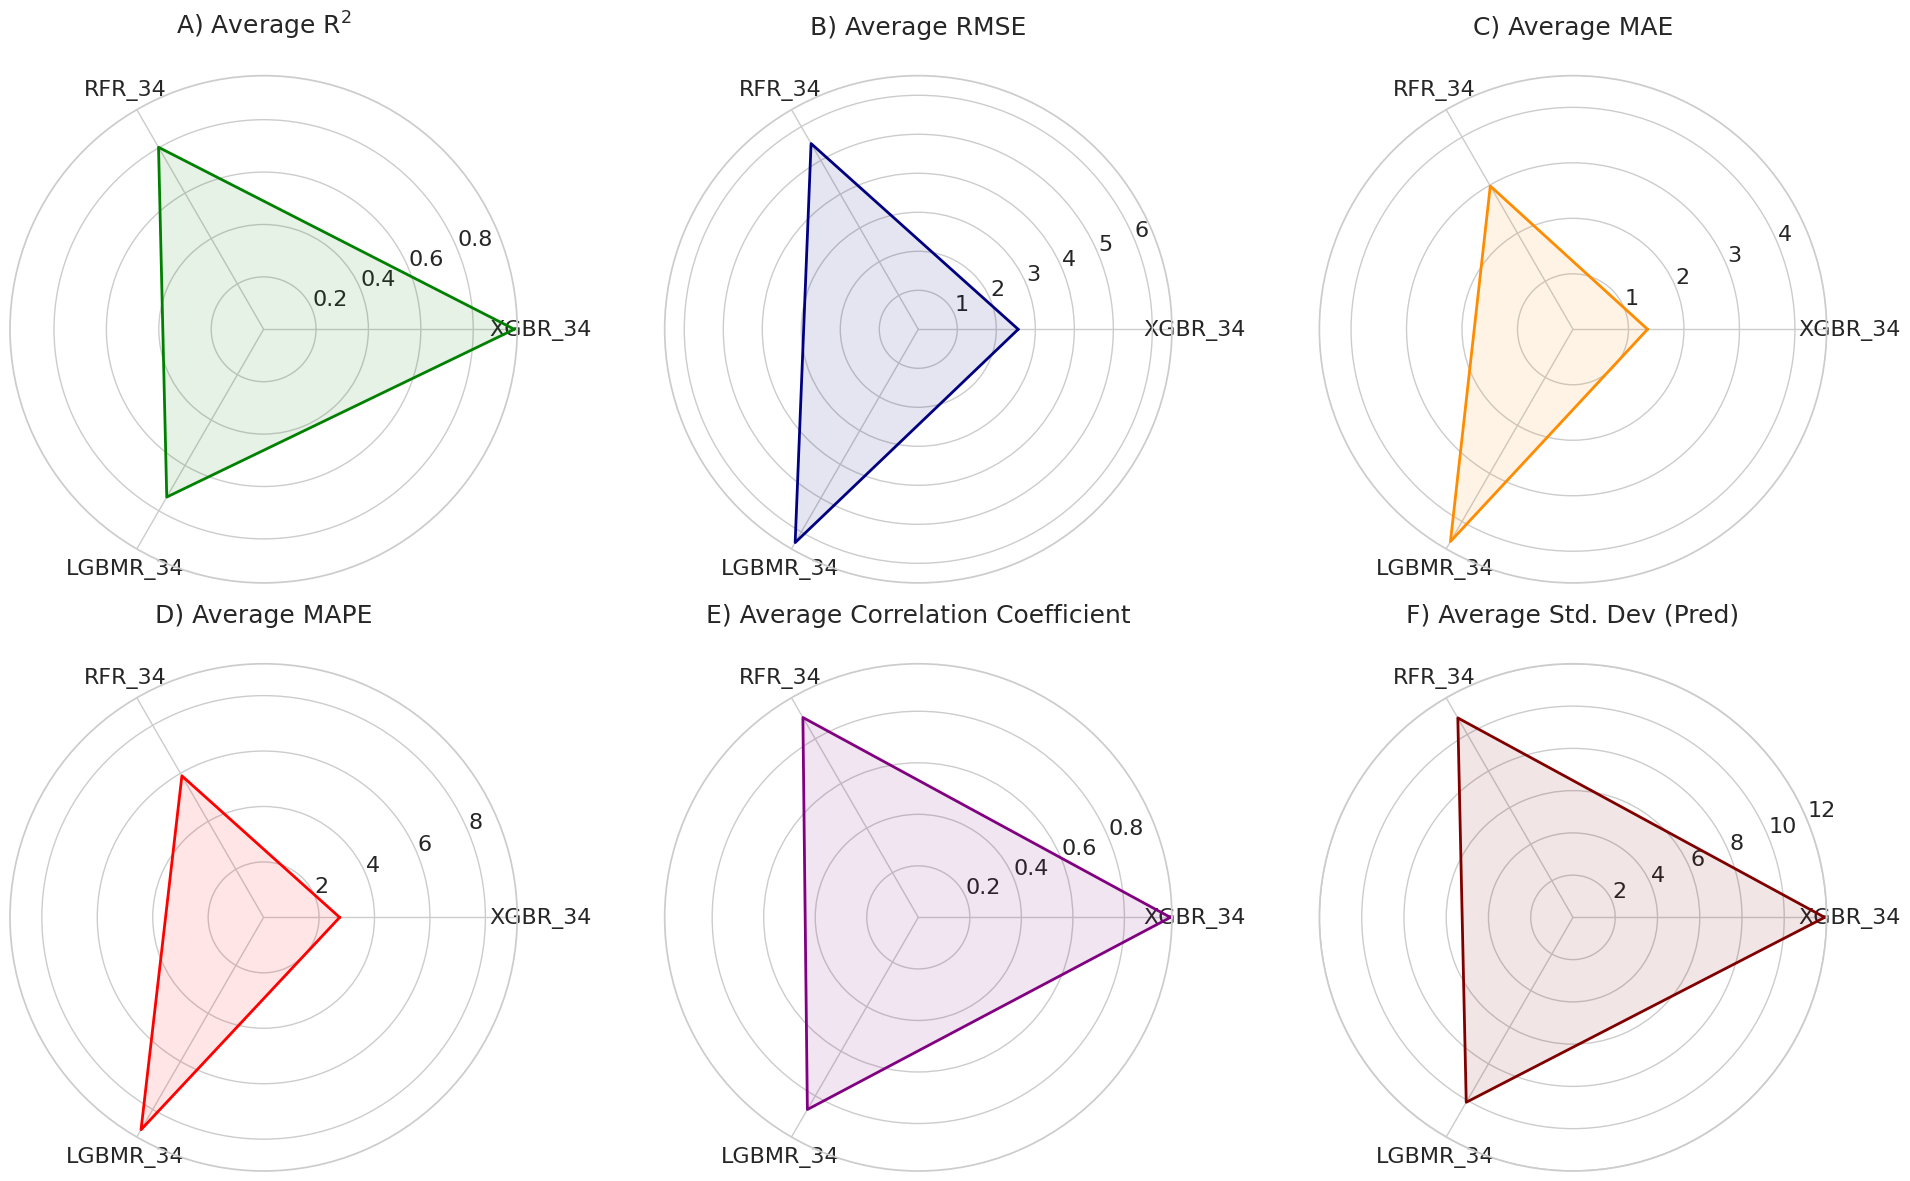

In [ ]:
metrics = [
    'Average R-squared',
    'Average RMSE',
    'Average MAE',
    'Average MAPE',
    'Average Correlation Coefficient',
    'Average Std. Dev (Pred)'
]
data = {metric: [] for metric in metrics}

for model_name in results.keys():
    for metric in metrics:
        data[metric].append(results[model_name]['average_metrics'][metric])

# Radar Plot Function
def radar_chart(data, metric, title, color, ax):
    labels = list(results.keys())
    values = data[metric]

    # Number of variables
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Complete the loop
    values += values[:1]
    angles += angles[:1]

    # Create the radar plot on the given axis
    ax.fill(angles, values, color=color, alpha=0.10)
    ax.plot(angles, values, color=color, linewidth=2)

    # Show y-ticks with proper formatting


    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=16)  # Set tick labels font size
    ax.set_title(title, fontsize=18, pad=30)  # Set title font size
    ax.tick_params(axis='x')
    ax.tick_params(labelsize=16)

# Plotting all metrics in a 3x2 grid
fig, axs = plt.subplots(2, 3, figsize=(20, 12), subplot_kw={'polar': True})

# Map each metric to a radar plot
colors = ['green', 'navy', 'darkorange', 'red', 'purple', 'maroon']
titles = [
    'A) Average R$^2$', 'B) Average RMSE', 'C) Average MAE',
    'D) Average MAPE', 'E) Average Correlation Coefficient', 'F) Average Std. Dev (Pred)'
]

for ax, metric, color, title in zip(axs.flat, metrics, colors, titles):
    radar_chart(data, metric, title, color, ax)

plt.tight_layout()
plt.show()




<ipython-input-28-ec3bc5e43be9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Value', data=df[df['Metric'] == metric], palette=palette)
<ipython-input-28-ec3bc5e43be9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Value', data=df[df['Metric'] == metric], palette=palette)
<ipython-input-28-ec3bc5e43be9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Model', y='Value', data=df[df['Metric'] == metric], palette=palette)
<ipython-input-28-ec3bc5e43be9>:41: FutureWarning: 

Passing `palette` without assign

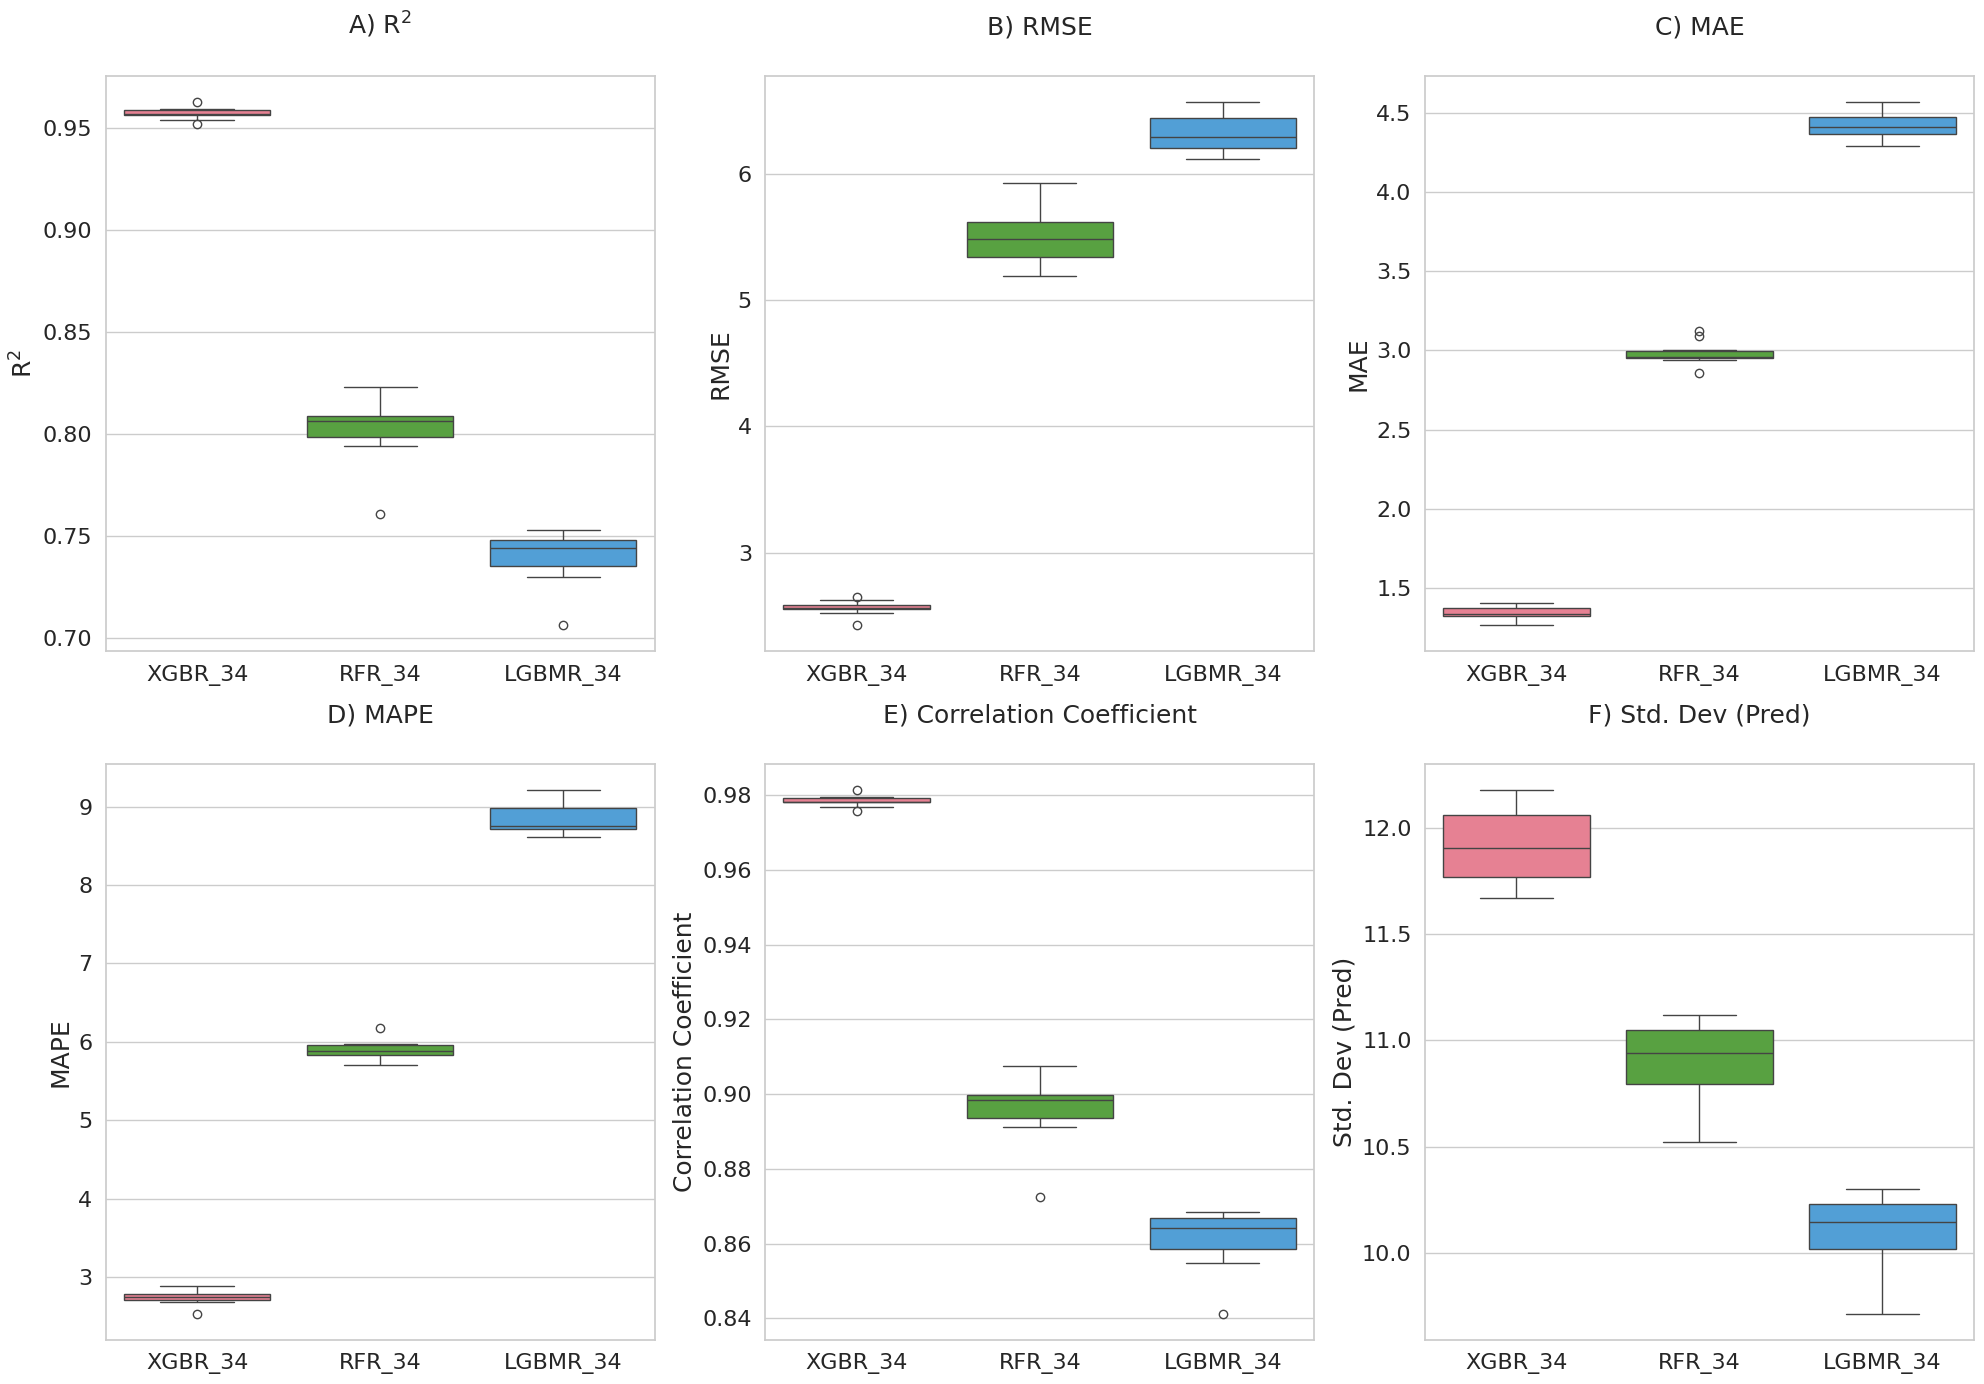

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Define metrics, keeping 'R-squared' as is
metrics = ['R-squared', 'RMSE', 'MAE', 'MAPE', 'Correlation Coefficient', 'Std. Dev (Pred)']
model_names = list(results.keys())

# Convert the results into a DataFrame for Seaborn
data = {
    'Model': [],
    'Metric': [],
    'Value': []
}

# Populate data for each model and metric
for model_name, model_results in results.items():
    for fold_metrics in model_results['fold_metrics']:
        for metric in metrics:
            if metric in fold_metrics:  # Ensure the metric exists in the current fold data
                data['Model'].append(model_name)
                data['Metric'].append(metric)
                data['Value'].append(fold_metrics[metric])

# Create a DataFrame from the data dictionary
df = pd.DataFrame(data)

# Plotting with Seaborn and Matplotlib subplots
plt.figure(figsize=(20, 14))  # Adjusted figure size
sns.set_theme(style="whitegrid")

# Define a color palette for distinct model colors
palette = sns.color_palette("husl", len(model_names))

# Define alphabet labels for subplots
alphabet_labels = ["A", "B", "C", "D", "E", "F"]

# Create a grid of subplots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)  # 2 rows and 3 columns layout
    sns.boxplot(x='Model', y='Value', data=df[df['Metric'] == metric], palette=palette)

    # Adjust the title to show 'R²' using LaTeX formatting
    title_metric = metric if metric != 'R-squared' else 'R$^2$'
    plt.title(f'{alphabet_labels[i - 1]}) {title_metric}', fontsize=18,pad=30)  # Add alphabet labels and increase font size

    plt.xlabel('', fontsize=18)  # Hide x-axis label
    plt.ylabel(metric if metric != 'R-squared' else 'R$^2$', fontsize=18)  # Increase font size of ylabel
    plt.xticks(fontsize=16)  # Increase font size of x-ticks
    plt.yticks(fontsize=16)  # Increase font size of y-ticks

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()




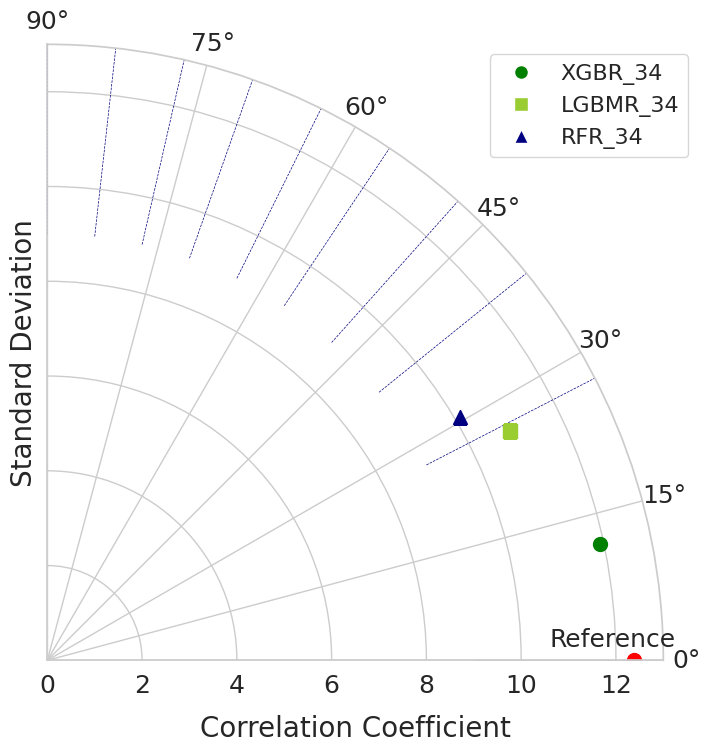

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Taylor Diagram class
class CartopyTaylorDiagram:
    def __init__(self, refstd, fig=None, rect=111, label='Reference'):
        self.refstd = refstd
        self.fig = fig if fig is not None else plt.figure(figsize=(10, 8))
        self.ax = self.fig.add_subplot(rect, projection='polar')

        # Set limits
        self.ax.set_ylim(0, 13)
        self.ax.set_xlim(0, np.pi / 2)

        # Reference point
        self.ax.plot(0, refstd, 'o', color='red', markersize=10, label=label)
        self.ax.annotate(label, (0, refstd), textcoords="offset points", xytext=(-15, 10), ha='center', fontsize=18)

        # Setup grid
        self.ax.grid(True)


        # Tick parameters
        self.ax.tick_params(axis='both', which='major', labelsize=18)

        # Labels
        self.ax.set_xlabel("Correlation Coefficient", fontsize=20, labelpad=30)
        self.ax.set_ylabel("Standard Deviation", fontsize=20, labelpad=1, rotation=90)

    def add_sample(self, stddev, corrcoef, marker, *args, **kwargs):
        theta = np.arccos(corrcoef)
        r = stddev
        self.ax.plot(theta, r, marker, *args, **kwargs)

    def add_correlation_lines(self):
        corrs = np.linspace(0, 1, 10)
        for corr in corrs:
            angle = np.arccos(corr)
            self.ax.plot([angle, angle], [9, 13], ls='--', color='navy', lw=0.5)

    def add_grid(self):
        self.ax.grid(True, linestyle='--', color='navy', alpha=0.5)

# Example data
std_true = 12.3759  # Average Std. Dev (True)
models = ['XGBR_34', 'LGBMR_34', 'RFR_34']
std_pred = [11.9148, 10.9041, 10.1061]  # Use actual average std dev for RFR_34
correlations = [0.9784, 0.8959, 0.8611]  # Placeholder for RFR_34

# Define custom colors for markers
colors = ['green', 'yellowgreen', 'navy', 'purple']  # Green, Red, Navy, Magenta (high intensity)

# Create the Taylor Diagram
fig = plt.figure(figsize=(10, 8))
taylor_diag = CartopyTaylorDiagram(std_true, fig=fig)

# Add correlation lines
taylor_diag.add_correlation_lines()

# Define different markers for each model
markers = ['o', 's', '^']  # Circle, square, triangle, diamond

# Add each model to the diagram with specified colors and markers
for i, (std, corr) in enumerate(zip(std_pred, correlations)):
    taylor_diag.add_sample(std, corr, marker=markers[i],
                          color=colors[i], markersize=10, linestyle='none')

# Create custom legend handles with specified colors
legend_handles = [plt.Line2D([0], [0], marker=markers[i], color='w',
                             label=models[i], markerfacecolor=colors[i],
                             markersize=10) for i in range(len(models))]

# Add legend to the right
plt.legend(handles=legend_handles, loc='center left',
           bbox_to_anchor=(0.7, 0.9), fontsize=16)

# Show the plot
plt.show()


**FEATURE Importance Analysis of XGBR_34 (The best performing model)**

<ipython-input-30-74488731eff1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n), palette='viridis')


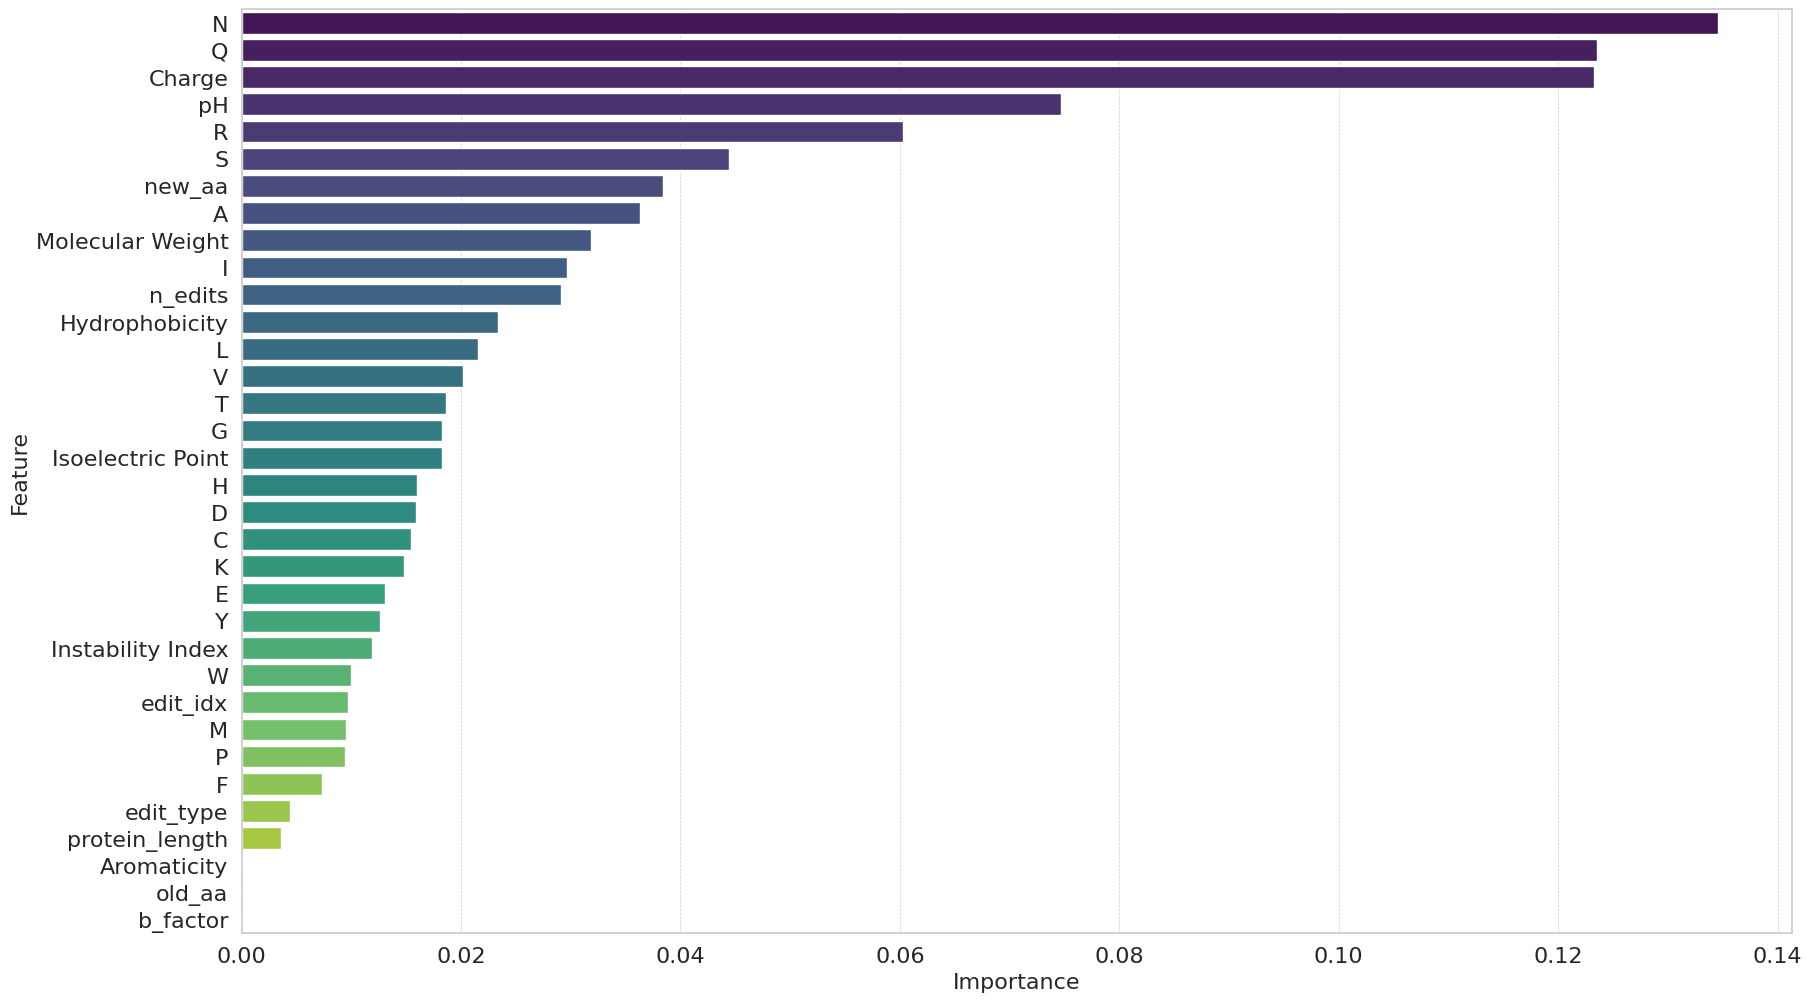

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have already trained an XGBR model named 'model_xgbr_1'
# You can replace this with your trained model

# Get feature importances from the trained model
feature_importance = model_xgbr_34.feature_importances_

# Get the names of the features (assuming you have them in a variable 'X_train')
feature_names = X_train.columns

# Create a DataFrame to store the feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n = 34  # Change this value to the number of top features you want to visualize
plt.figure(figsize=(20, 12))

# Create a bar plot with a color palette and add a grid
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n), palette='viridis')

# Add grid lines to the plot
plt.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5)

# Customize the plot with title, axis labels, and tick fonts

plt.xlabel('Importance', fontsize=16)  # Set x-axis label font size
plt.ylabel('Feature', fontsize=16)  # Set y-axis label font size
plt.xticks(fontsize=16)  # Set tick font size for x-axis
plt.yticks(fontsize=16)  # Set tick font size for y-axis

# Show the plot
plt.show()


**DATA PREPERATION MOdel PERFORMANCE**

In [ ]:
# prompt: from previous code print average scores


PERFORMANCE COMPARISION of **MODELS** **bold text**

In [ ]:
# Assuming X_train and y_train are already defined
num_folds = 10
kf = KFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize models
models = {
    'XGBR_34': model_xgbr_34,  # Assuming model_xgbr_34 is pre-defined
    'RFR_34': RandomForestRegressor(n_estimators=100, random_state=123),
    'LGBMR_34': lgb.LGBMRegressor(random_state=123)
}

# Dictionary to store the results
results = {model_name: {'fold_metrics': [], 'average_metrics': {}} for model_name in models.keys()}

# Function to calculate metrics
def calculate_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    corr, _ = pearsonr(y_test, y_pred)
    std_true = np.std(y_test)
    std_pred = np.std(y_pred)
    return rmse, mae, r2, mape, corr, std_true, std_pred

# Loop over each model
for model_name, model in models.items():
    rmse_scores, mae_scores, r2_scores, mape_scores, corr_coeffs, std_true, std_pred = [], [], [], [], [], [], []

    # KFold cross-validation
    for train_index, test_index in kf.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Train the model (fit only if the model requires training)
        if model_name != 'XGBR_34':  # Assuming XGBR is pre-trained, adjust if needed
            model.fit(X_train_fold, y_train_fold)

        # Predict and evaluate
        y_pred_fold = model.predict(X_test_fold)
        rmse, mae, r2, mape, corr, std_true_fold, std_pred_fold = calculate_metrics(y_test_fold, y_pred_fold)

        # Store fold metrics
        rmse_scores.append(rmse)
        mae_scores.append(mae)
        r2_scores.append(r2)
        mape_scores.append(mape)
        corr_coeffs.append(corr)
        std_true.append(std_true_fold)
        std_pred.append(std_pred_fold)

        # Store metrics in results dictionary
        results[model_name]['fold_metrics'].append({
            'RMSE': rmse,
            'MAE': mae,
            'R-squared': r2,
            'MAPE': mape,
            'Correlation Coefficient': corr,
            'Std. Dev (True)': std_true_fold,
            'Std. Dev (Pred)': std_pred_fold
        })

    # Calculate and store average metrics for each model
    results[model_name]['average_metrics'] = {
        'Average RMSE': np.mean(rmse_scores),
        'Average MAE': np.mean(mae_scores),
        'Average R-squared': np.mean(r2_scores),
        'Average MAPE': np.mean(mape_scores),
        'Average Correlation Coefficient': np.mean(corr_coeffs),
        'Average Std. Dev (True)': np.mean(std_true),
        'Average Std. Dev (Pred)': np.mean(std_pred)
    }

# Print results for each model
for model_name in results.keys():
    print(f'\nResults for {model_name}:')
    for i, fold_metrics in enumerate(results[model_name]['fold_metrics']):
        print(f'Fold {i + 1}:')
        for key, value in fold_metrics.items():
            print(f'   {key} = {value:.4f}')
    print('\nAverage Metrics:')
    for key, value in results[model_name]['average_metrics'].items():
        print(f'   {key} = {value:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1758
[LightGBM] [Info] Number of data points in the train set: 28983, number of used features: 33
[LightGBM] [Info] Start training from score 52.941907
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004297 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1760
[LightGBM] [Info] Number of data points in the train set: 28983, number of used features: 33
[LightGBM] [Info] Start training from score 52.981192
[LightGBM] [Warning] Found

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np

# Assuming you have your training data split as 'X_train' (features) and 'y_train' (labels/target)
# You can adjust the number of folds as needed
num_folds = 10

# Create a KFold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize lists to store the evaluation metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
corr_coeffs = []  # To store Pearson correlation coefficients
std_true = []     # To store the standard deviation of the true values
std_pred = []     # To store the standard deviation of the predicted values

# Iterate through each fold
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Make predictions on the test fold using your pre-trained XGBoost model
    y_pred_fold = model_xgbr_34.predict(X_test_fold)

    # Calculate evaluation metrics for this fold
    rmse_fold = np.sqrt(mean_squared_error(y_test_fold, y_pred_fold))
    mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)
    r2_fold = r2_score(y_test_fold, y_pred_fold)
    mape_fold = np.mean(np.abs((y_test_fold - y_pred_fold) / y_test_fold)) * 100
    corr_fold, _ = pearsonr(y_test_fold, y_pred_fold)  # Pearson correlation coefficient

    # Standard deviation of the true and predicted values
    std_true_fold = np.std(y_test_fold)
    std_pred_fold = np.std(y_pred_fold)

    # Append the metrics for this fold to the respective lists
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)
    mape_scores.append(mape_fold)
    corr_coeffs.append(corr_fold)
    std_true.append(std_true_fold)
    std_pred.append(std_pred_fold)

# Print the evaluation metrics for each fold
for i in range(num_folds):
    print(f'Fold {i + 1}:')
    print(f'   RMSE = {rmse_scores[i]:.4f}')
    print(f'   MAE = {mae_scores[i]:.4f}')
    print(f'   R-squared = {r2_scores[i]:.4f}')
    print(f'   MAPE = {mape_scores[i]:.4f}%')
    print(f'   Correlation Coefficient = {corr_coeffs[i]:.4f}')
    print(f'   Std. Dev (True) = {std_true[i]:.4f}')
    print(f'   Std. Dev (Pred) = {std_pred[i]:.4f}')

# Calculate and print the average evaluation metrics across all folds
avg_rmse_1 = np.mean(rmse_scores)
avg_mae_1 = np.mean(mae_scores)
avg_r2_1 = np.mean(r2_scores)
avg_mape_1 = np.mean(mape_scores)
avg_corr_1 = np.mean(corr_coeffs)
avg_std_true_1 = np.mean(std_true)
avg_std_pred_1 = np.mean(std_pred)

print('\nAverage Metrics:')
print(f'   Average RMSE = {avg_rmse_1:.4f}')
print(f'   Average MAE = {avg_mae_1:.4f}')
print(f'   Average R-squared = {avg_r2_1:.4f}')
print(f'   Average MAPE = {avg_mape_1:.4f}%')
print(f'   Average Correlation Coefficient = {avg_corr_1:.4f}')
print(f'   Average Std. Dev (True) = {avg_std_true_1:.4f}')
print(f'   Average Std. Dev (Pred) = {avg_std_pred_1:.4f}')



Fold 1:
   RMSE = 2.5487
   MAE = 1.3166
   R-squared = 0.9574
   MAPE = 2.7149%
   Correlation Coefficient = 0.9786
   Std. Dev (True) = 12.3474
   Std. Dev (Pred) = 11.9079
Fold 2:
   RMSE = 2.6522
   MAE = 1.4083
   R-squared = 0.9521
   MAPE = 2.8959%
   Correlation Coefficient = 0.9759
   Std. Dev (True) = 12.1187
   Std. Dev (Pred) = 11.6674
Fold 3:
   RMSE = 2.5727
   MAE = 1.3815
   R-squared = 0.9564
   MAPE = 2.8164%
   Correlation Coefficient = 0.9782
   Std. Dev (True) = 12.3243
   Std. Dev (Pred) = 11.8079
Fold 4:
   RMSE = 2.6285
   MAE = 1.3727
   R-squared = 0.9539
   MAPE = 2.8010%
   Correlation Coefficient = 0.9768
   Std. Dev (True) = 12.2416
   Std. Dev (Pred) = 11.7525
Fold 5:
   RMSE = 2.4246
   MAE = 1.2658
   R-squared = 0.9626
   MAPE = 2.5377%
   Correlation Coefficient = 0.9813
   Std. Dev (True) = 12.5417
   Std. Dev (Pred) = 12.0777
Fold 6:
   RMSE = 2.5614
   MAE = 1.3345
   R-squared = 0.9592
   MAPE = 2.6913%
   Correlation Coefficient = 0.9796
   Std. 

In [ ]:

# Assuming you uploaded a CSV file named 'your_data.csv'
df = pd.read_csv('featuresnew.csv')

X = df.drop(columns=["tm"])  # Replace "target_column" with the actual column name
y = df["tm"]                # Replace "target_column" with the actual column name
df

,pH,tm,protein_length,A,C,D,E,F,G,H,...,Instability Index,Hydrophobicity,Isoelectric Point,Charge,n_edits,edit_type,edit_idx,old_aa,new_aa,b_factor
0,7.0,75.7,341,45,1,13,30,13,38,3,...,28,0,6,-2,271,1,0,1,0,45.11
1,7.0,50.5,286,28,0,10,52,6,18,4,...,65,-1,5,-13,231,2,0,1,2,45.11
2,7.0,47.2,265,20,5,19,29,12,16,7,...,51,-1,5,-21,211,2,0,1,2,45.11
3,7.0,55.9,301,15,16,18,17,3,28,10,...,40,-1,6,-2,235,2,0,1,2,45.11
4,7.0,48.1,287,41,1,19,16,9,25,0,...,22,0,5,-2,219,1,0,1,0,45.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40250,7.0,49.4,228,12,0,13,13,13,11,2,...,47,0,6,-1,191,1,0,1,0,45.11
40251,7.0,48.6,300,18,6,12,12,23,14,7,...,48,0,9,11,234,2,0,1,21,45.11
40252,7.0,49.4,350,18,14,11,22,29,16,8,...,37,0,8,5,275,1,0,1,0,45.11
40253,7.0,42.1,274,12,0,25,14,12,22,5,...,16,-1,7,0,214,2,0,1,21,45.11


In [ ]:
# Set the threshold for feature importance
threshold = 0.01

# Select features with importance greater than or equal to the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Create a new DataFrame 'df2' containing only the selected features
df2 = df[selected_features]
threshold = 0.015

# Select features with importance greater than or equal to the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Create a new DataFrame 'df2' containing only the selected features
df3 = df[selected_features]
threshold = 0.02

# Select features with importance greater than or equal to the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature'].tolist()

# Create a new DataFrame 'df2' containing only the selected features
df4 = df[selected_features]

In [ ]:
X.shape

(40255, 34)

In [ ]:
df2.shape

(40255, 24)

In [ ]:
df3.shape

(40255, 20)

In [ ]:
df4.shape

(40255, 14)

In [ ]:
X2 = df2  # Replace "target_column" with the actual column name
y2 = df["tm"]                # Replace "target_column" with the actual column name

# Split the data into an 80:20 train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3 = df3  # Replace "target_column" with the actual column name
y3 = df["tm"]                # Replace "target_column" with the actual column name

# Split the data into an 80:20 train-test split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
X4 = df4  # Replace "target_column" with the actual column name
y4 = df["tm"]                # Replace "target_column" with the actual column name

# Split the data into an 80:20 train-test split
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
model_xgbr_24 = xgb.XGBRegressor(n_estimators=100, max_depth=10, random_state=123)
model_xgbr_24.fit(X2_train, y2_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [ ]:
model_xgbr_20 = xgb.XGBRegressor(n_estimators=100, max_depth=10, random_state=123)
model_xgbr_20.fit(X3_train, y3_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [ ]:
model_xgbr_14 = xgb.XGBRegressor(n_estimators=100, max_depth=10, random_state=123)
model_xgbr_14.fit(X4_train, y4_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=123, ...)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np

# Assuming you have your training data split as 'X3_train' (features) and 'y2_train' (labels/target)
# You can adjust the number of folds as needed
num_folds = 10

# Create a KFold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize lists to store the evaluation metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
corr_coeffs = []  # To store Pearson correlation coefficients
std_true = []     # To store the standard deviation of the true values
std_pred = []     # To store the standard deviation of the predicted values

# Iterate through each fold
for train_index, test_index in kf.split(X3_train):
    x2_train_fold, x2_test_fold = X2_train.iloc[train_index], X2_train.iloc[test_index]
    y2_train_fold, y2_test_fold = y2_train.iloc[train_index], y2_train.iloc[test_index]

    # Make predictions on the test fold using your pre-trained XGBoost model_xgbr_3
    y2_pred_fold = model_xgbr_24.predict(x2_test_fold)

    # Calculate evaluation metrics for this fold
    rmse_fold = np.sqrt(mean_squared_error(y2_test_fold, y2_pred_fold))
    mae_fold = mean_absolute_error(y2_test_fold, y2_pred_fold)
    r2_fold = r2_score(y2_test_fold, y2_pred_fold)
    mape_fold = np.mean(np.abs((y2_test_fold - y2_pred_fold) / y2_test_fold)) * 100
    corr_fold, _ = pearsonr(y2_test_fold, y2_pred_fold)  # Pearson correlation coefficient

    # Standard deviation of the true and predicted values
    std_true_fold = np.std(y2_test_fold)
    std_pred_fold = np.std(y2_pred_fold)

    # Append the metrics for this fold to the respective lists
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)
    mape_scores.append(mape_fold)
    corr_coeffs.append(corr_fold)
    std_true.append(std_true_fold)
    std_pred.append(std_pred_fold)

# Print the evaluation metrics for each fold
for i in range(num_folds):
    print(f'Fold {i + 1}:')
    print(f'   RMSE = {rmse_scores[i]:.4f}')
    print(f'   MAE = {mae_scores[i]:.4f}')
    print(f'   R-squared = {r2_scores[i]:.4f}')
    print(f'   MAPE = {mape_scores[i]:.4f}%')
    print(f'   Correlation Coefficient = {corr_coeffs[i]:.4f}')
    print(f'   Std. Dev (True) = {std_true[i]:.4f}')
    print(f'   Std. Dev (Pred) = {std_pred[i]:.4f}')

# Calculate and print the average evaluation metrics across all folds for model_xgbr_3
avg_rmse_2 = np.mean(rmse_scores)
avg_mae_2 = np.mean(mae_scores)
avg_r2_2 = np.mean(r2_scores)
avg_mape_2 = np.mean(mape_scores)
avg_corr_2 = np.mean(corr_coeffs)
avg_std_true_2 = np.mean(std_true)
avg_std_pred_2 = np.mean(std_pred)

print('\nAverage Metrics for model_xgbr_3:')
print(f'   Average RMSE = {avg_rmse_2:.2f}')
print(f'   Average MAE = {avg_mae_2:.2f}')
print(f'   Average R-squared = {avg_r2_2:.2f}')
print(f'   Average MAPE = {avg_mape_2:.2f}%')
print(f'   Average Correlation Coefficient = {avg_corr_2:.2f}')
print(f'   Average Std. Dev (True) = {avg_std_true_2:.2f}')
print(f'   Average Std. Dev (Pred) = {avg_std_pred_2:.2f}')


Fold 1:
   RMSE = 2.5336
   MAE = 1.3076
   R-squared = 0.9579
   MAPE = 2.6947%
   Correlation Coefficient = 0.9788
   Std. Dev (True) = 12.3474
   Std. Dev (Pred) = 11.9261
Fold 2:
   RMSE = 2.6476
   MAE = 1.4003
   R-squared = 0.9523
   MAPE = 2.8799%
   Correlation Coefficient = 0.9760
   Std. Dev (True) = 12.1187
   Std. Dev (Pred) = 11.6693
Fold 3:
   RMSE = 2.5672
   MAE = 1.3583
   R-squared = 0.9566
   MAPE = 2.7714%
   Correlation Coefficient = 0.9783
   Std. Dev (True) = 12.3243
   Std. Dev (Pred) = 11.8152
Fold 4:
   RMSE = 2.6263
   MAE = 1.3597
   R-squared = 0.9540
   MAPE = 2.7756%
   Correlation Coefficient = 0.9768
   Std. Dev (True) = 12.2416
   Std. Dev (Pred) = 11.7615
Fold 5:
   RMSE = 2.4357
   MAE = 1.2672
   R-squared = 0.9623
   MAPE = 2.5427%
   Correlation Coefficient = 0.9811
   Std. Dev (True) = 12.5417
   Std. Dev (Pred) = 12.0720
Fold 6:
   RMSE = 2.5705
   MAE = 1.3446
   R-squared = 0.9589
   MAPE = 2.7171%
   Correlation Coefficient = 0.9794
   Std. 

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np

# Assuming you have your training data split as 'X3_train' (features) and 'y2_train' (labels/target)
# You can adjust the number of folds as needed
num_folds = 10

# Create a KFold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize lists to store the evaluation metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
corr_coeffs = []  # To store Pearson correlation coefficients
std_true = []     # To store the standard deviation of the true values
std_pred = []     # To store the standard deviation of the predicted values

# Iterate through each fold
for train_index, test_index in kf.split(X3_train):
    x3_train_fold, x3_test_fold = X3_train.iloc[train_index], X3_train.iloc[test_index]
    y3_train_fold, y3_test_fold = y3_train.iloc[train_index], y3_train.iloc[test_index]

    # Make predictions on the test fold using your pre-trained XGBoost model_xgbr_3
    y3_pred_fold = model_xgbr_20.predict(x3_test_fold)

    # Calculate evaluation metrics for this fold
    rmse_fold = np.sqrt(mean_squared_error(y3_test_fold, y3_pred_fold))
    mae_fold = mean_absolute_error(y3_test_fold, y3_pred_fold)
    r2_fold = r2_score(y3_test_fold, y3_pred_fold)
    mape_fold = np.mean(np.abs((y3_test_fold - y3_pred_fold) / y3_test_fold)) * 100
    corr_fold, _ = pearsonr(y3_test_fold, y3_pred_fold)  # Pearson correlation coefficient

    # Standard deviation of the true and predicted values
    std_true_fold = np.std(y3_test_fold)
    std_pred_fold = np.std(y3_pred_fold)

    # Append the metrics for this fold to the respective lists
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)
    mape_scores.append(mape_fold)
    corr_coeffs.append(corr_fold)
    std_true.append(std_true_fold)
    std_pred.append(std_pred_fold)

# Print the evaluation metrics for each fold
for i in range(num_folds):
    print(f'Fold {i + 1}:')
    print(f'   RMSE = {rmse_scores[i]:.2f}')
    print(f'   MAE = {mae_scores[i]:.2f}')
    print(f'   R-squared = {r2_scores[i]:.2f}')
    print(f'   MAPE = {mape_scores[i]:.2f}%')
    print(f'   Correlation Coefficient = {corr_coeffs[i]:.2f}')
    print(f'   Std. Dev (True) = {std_true[i]:.2f}')
    print(f'   Std. Dev (Pred) = {std_pred[i]:.2f}')

# Calculate and print the average evaluation metrics across all folds for model_xgbr_3
avg_rmse_3 = np.mean(rmse_scores)
avg_mae_3 = np.mean(mae_scores)
avg_r2_3 = np.mean(r2_scores)
avg_mape_3 = np.mean(mape_scores)
avg_corr_3 = np.mean(corr_coeffs)
avg_std_true_3 = np.mean(std_true)
avg_std_pred_3 = np.mean(std_pred)

print('\nAverage Metrics for model_xgbr_3:')
print(f'   Average RMSE = {avg_rmse_3:.2f}')
print(f'   Average MAE = {avg_mae_3:.2f}')
print(f'   Average R-squared = {avg_r2_3:.2f}')
print(f'   Average MAPE = {avg_mape_3:.2f}%')
print(f'   Average Correlation Coefficient = {avg_corr_3:.2f}')
print(f'   Average Std. Dev (True) = {avg_std_true_3:.2f}')
print(f'   Average Std. Dev (Pred) = {avg_std_pred_3:.2f}')

Fold 1:
   RMSE = 2.80
   MAE = 1.56
   R-squared = 0.95
   MAPE = 3.20%
   Correlation Coefficient = 0.97
   Std. Dev (True) = 12.35
   Std. Dev (Pred) = 11.85
Fold 2:
   RMSE = 2.86
   MAE = 1.61
   R-squared = 0.94
   MAPE = 3.30%
   Correlation Coefficient = 0.97
   Std. Dev (True) = 12.12
   Std. Dev (Pred) = 11.63
Fold 3:
   RMSE = 2.82
   MAE = 1.61
   R-squared = 0.95
   MAPE = 3.29%
   Correlation Coefficient = 0.97
   Std. Dev (True) = 12.32
   Std. Dev (Pred) = 11.73
Fold 4:
   RMSE = 2.89
   MAE = 1.62
   R-squared = 0.94
   MAPE = 3.28%
   Correlation Coefficient = 0.97
   Std. Dev (True) = 12.24
   Std. Dev (Pred) = 11.72
Fold 5:
   RMSE = 2.66
   MAE = 1.50
   R-squared = 0.95
   MAPE = 3.00%
   Correlation Coefficient = 0.98
   Std. Dev (True) = 12.54
   Std. Dev (Pred) = 12.00
Fold 6:
   RMSE = 2.79
   MAE = 1.57
   R-squared = 0.95
   MAPE = 3.16%
   Correlation Coefficient = 0.98
   Std. Dev (True) = 12.68
   Std. Dev (Pred) = 12.10
Fold 7:
   RMSE = 2.80
   MAE = 1.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np

# Assuming you have your training data split as 'X3_train' (features) and 'y2_train' (labels/target)
# You can adjust the number of folds as needed
num_folds = 10

# Create a KFold cross-validation object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=123)

# Initialize lists to store the evaluation metrics for each fold
rmse_scores = []
mae_scores = []
r2_scores = []
mape_scores = []
corr_coeffs = []  # To store Pearson correlation coefficients
std_true = []     # To store the standard deviation of the true values
std_pred = []     # To store the standard deviation of the predicted values

# Iterate through each fold
for train_index, test_index in kf.split(X4_train):
    x4_train_fold, x4_test_fold = X4_train.iloc[train_index], X4_train.iloc[test_index]
    y4_train_fold, y4_test_fold = y3_train.iloc[train_index], y4_train.iloc[test_index]

    # Make predictions on the test fold using your pre-trained XGBoost model_xgbr_3
    y4_pred_fold = model_xgbr_14.predict(x4_test_fold)

    # Calculate evaluation metrics for this fold
    rmse_fold = np.sqrt(mean_squared_error(y4_test_fold, y4_pred_fold))
    mae_fold = mean_absolute_error(y4_test_fold, y4_pred_fold)
    r2_fold = r2_score(y4_test_fold, y4_pred_fold)
    mape_fold = np.mean(np.abs((y4_test_fold - y4_pred_fold) / y4_test_fold)) * 100
    corr_fold, _ = pearsonr(y4_test_fold, y4_pred_fold)  # Pearson correlation coefficient

    # Standard deviation of the true and predicted values
    std_true_fold = np.std(y4_test_fold)
    std_pred_fold = np.std(y4_pred_fold)

    # Append the metrics for this fold to the respective lists
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    r2_scores.append(r2_fold)
    mape_scores.append(mape_fold)
    corr_coeffs.append(corr_fold)
    std_true.append(std_true_fold)
    std_pred.append(std_pred_fold)

# Print the evaluation metrics for each fold
for i in range(num_folds):
    print(f'Fold {i + 1}:')
    print(f'   RMSE = {rmse_scores[i]:.2f}')
    print(f'   MAE = {mae_scores[i]:.2f}')
    print(f'   R-squared = {r2_scores[i]:.2f}')
    print(f'   MAPE = {mape_scores[i]:.2f}%')
    print(f'   Correlation Coefficient = {corr_coeffs[i]:.2f}')
    print(f'   Std. Dev (True) = {std_true[i]:.2f}')
    print(f'   Std. Dev (Pred) = {std_pred[i]:.2f}')

# Calculate and print the average evaluation metrics across all folds for model_xgbr_3
avg_rmse_4 = np.mean(rmse_scores)
avg_mae_4 = np.mean(mae_scores)
avg_r2_4 = np.mean(r2_scores)
avg_mape_4 = np.mean(mape_scores)
avg_corr_4 = np.mean(corr_coeffs)
avg_std_true_4 = np.mean(std_true)
avg_std_pred_4 = np.mean(std_pred)

print('\nAverage Metrics for model_xgbr_4:')
print(f'   Average RMSE = {avg_rmse_4:.4f}')
print(f'   Average MAE = {avg_mae_4:.4f}')
print(f'   Average R-squared = {avg_r2_4:.4f}')
print(f'   Average MAPE = {avg_mape_4:.2f}%')
print(f'   Average Correlation Coefficient = {avg_corr_4:.4f}')
print(f'   Average Std. Dev (True) = {avg_std_true_4:.4f}')
print(f'   Average Std. Dev (Pred) = {avg_std_pred_4:.4f}')

Fold 1:
   RMSE = 2.85
   MAE = 1.61
   R-squared = 0.95
   MAPE = 3.30%
   Correlation Coefficient = 0.97
   Std. Dev (True) = 12.35
   Std. Dev (Pred) = 11.81
Fold 2:
   RMSE = 2.94
   MAE = 1.68
   R-squared = 0.94
   MAPE = 3.44%
   Correlation Coefficient = 0.97
   Std. Dev (True) = 12.12
   Std. Dev (Pred) = 11.59
Fold 3:
   RMSE = 2.92
   MAE = 1.69
   R-squared = 0.94
   MAPE = 3.46%
   Correlation Coefficient = 0.97
   Std. Dev (True) = 12.32
   Std. Dev (Pred) = 11.68
Fold 4:
   RMSE = 2.95
   MAE = 1.68
   R-squared = 0.94
   MAPE = 3.40%
   Correlation Coefficient = 0.97
   Std. Dev (True) = 12.24
   Std. Dev (Pred) = 11.69
Fold 5:
   RMSE = 2.75
   MAE = 1.58
   R-squared = 0.95
   MAPE = 3.16%
   Correlation Coefficient = 0.98
   Std. Dev (True) = 12.54
   Std. Dev (Pred) = 11.94
Fold 6:
   RMSE = 2.84
   MAE = 1.62
   R-squared = 0.95
   MAPE = 3.26%
   Correlation Coefficient = 0.97
   Std. Dev (True) = 12.68
   Std. Dev (Pred) = 12.09
Fold 7:
   RMSE = 2.88
   MAE = 1.

In [ ]:
import pandas as pd

# Create a DataFrame to organize the performance metrics
performance_metrics = pd.DataFrame({
    'Model': ['XGBR_34', 'XGBR_24', 'XGBR_20', 'XGBR_14'],
    'RMSE': [avg_rmse_1, avg_rmse_2, avg_rmse_3, avg_rmse_4],
    'MAE': [avg_mae_1, avg_mae_2, avg_mae_3, avg_mae_4],
    'R-squared': [avg_r2_1, avg_r2_2, avg_r2_3, avg_r2_4],
    'MAPE': [avg_mape_1, avg_mape_2, avg_mape_3, avg_mape_4],
    'Correlation Coefficient': [avg_corr_1, avg_corr_2, avg_corr_3, avg_corr_4],
    'Std. Dev (True)': [avg_std_true_1, avg_std_true_2, avg_std_true_3, avg_std_true_4],
    'Std. Dev (Pred)': [avg_std_pred_1, avg_std_pred_2, avg_std_pred_3, avg_std_pred_4]
})

In [ ]:
# Set the 'Model' column as the index
performance_metrics.set_index('Model', inplace=True)

# Print the performance metrics in a tabular format
print(performance_metrics)

             RMSE       MAE  R-squared      MAPE  Correlation Coefficient  \
Model                                                                       
XGBR_34  2.561337  1.344211   0.957093  2.742941                 0.978449   
XGBR_24  2.561684  1.336182   0.957086  2.727692                 0.978438   
XGBR_20  2.797976  1.572341   0.948810  3.196793                 0.974237   
XGBR_14  2.876043  1.643038   0.945913  3.339764                 0.972789   

         Std. Dev (True)  Std. Dev (Pred)  
Model                                      
XGBR_34        12.375933        11.914834  
XGBR_24        12.375933        11.920269  
XGBR_20        12.375933        11.841797  
XGBR_14        12.375933        11.798067  


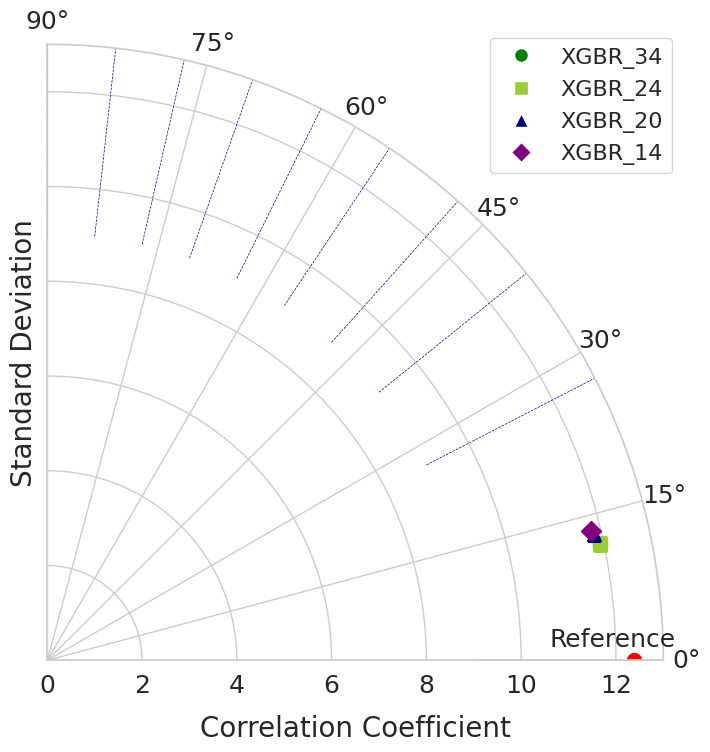

In [ ]:
# Define a function to create the Taylor Diagram using Cartopy and Matplotlib

std_true = 12.375933  # True standard deviation
models = ['XGBR_34', 'XGBR_24', 'XGBR_20', 'XGBR_14']
std_pred = [11.914834, 11.920269, 11.841797, 11.798067]
correlations = [0.978449 , 0.978438, 0.974237,0.972789]  # Fixed correlations (0-1 range)


class CartopyTaylorDiagram:
    def __init__(self, refstd, fig=None, rect=111, label='Reference'):
        self.refstd = refstd
        self.fig = fig if fig is not None else plt.figure(figsize=(10, 8))
        self.ax = self.fig.add_subplot(rect, projection='polar')

        # Set the plot background to very light blue

        # Set the limits of the polar plot
        self.ax.set_ylim(0, 13)  # Set y-axis limit to the range of 9 to 13
        self.ax.set_xlim(0, np.pi / 2)

        # Add the reference point at (0, refstd)
        self.ax.plot(0, refstd, 'o', color='red', markersize=10, label=label)
        self.ax.annotate(label, (0, refstd), textcoords="offset points",
                         xytext=(-15, 10), ha='center', fontsize=18)

        # Set up gridlines and labels for better readability
        self.ax.grid(True)

        # Increase the font size for tick labels
        self.ax.tick_params(axis='both', which='major', labelsize=18)

        # Add labels for axes
        self.ax.set_xlabel("Correlation Coefficient", fontsize=20, labelpad=30)
        self.ax.set_ylabel("Standard Deviation", fontsize=20, labelpad=1, rotation=90)

    def add_sample(self, stddev, corrcoef, marker, *args, **kwargs):
        theta = np.arccos(corrcoef)  # Convert correlation coefficient to angle
        r = stddev
        self.ax.plot(theta, r, marker, *args, **kwargs)

    def add_correlation_lines(self):
        corrs = np.linspace(0, 1, 10)
        for corr in corrs:
            angle = np.arccos(corr)
            self.ax.plot([angle, angle], [9, 13], ls='--', color='navy', lw=0.5)

    def add_grid(self):
        self.ax.grid(True, linestyle='--', color='navy', alpha=0.7)

# Example data (Replace these with your actual data)
 # Fixed correlations (0-1 range)

# Define custom colors for markers
colors = ['green', 'yellowgreen', 'navy', 'purple']  # Green, Red, Navy, Magenta (high intensity)

# Create the Taylor Diagram
fig = plt.figure(figsize=(10, 8))
taylor_diag = CartopyTaylorDiagram(std_true, fig=fig)

# Add correlation lines
taylor_diag.add_correlation_lines()

# Define different markers for each model
markers = ['o', 's', '^', 'D']  # Circle, square, triangle, diamond

# Add each model to the diagram with specified colors and markers
for i, (std, corr) in enumerate(zip(std_pred, correlations)):
    taylor_diag.add_sample(std, corr, marker=markers[i],
                          color=colors[i], markersize=10, linestyle='none')

# Create custom legend handles with specified colors
legend_handles = [plt.Line2D([0], [0], marker=markers[i], color='w',
                             label=models[i], markerfacecolor=colors[i],
                             markersize=10) for i in range(len(models))]

# Add legend to the right
plt.legend(handles=legend_handles, loc='center left',
           bbox_to_anchor=(0.7, 0.9), fontsize=16)

# Show the plot
plt.show()

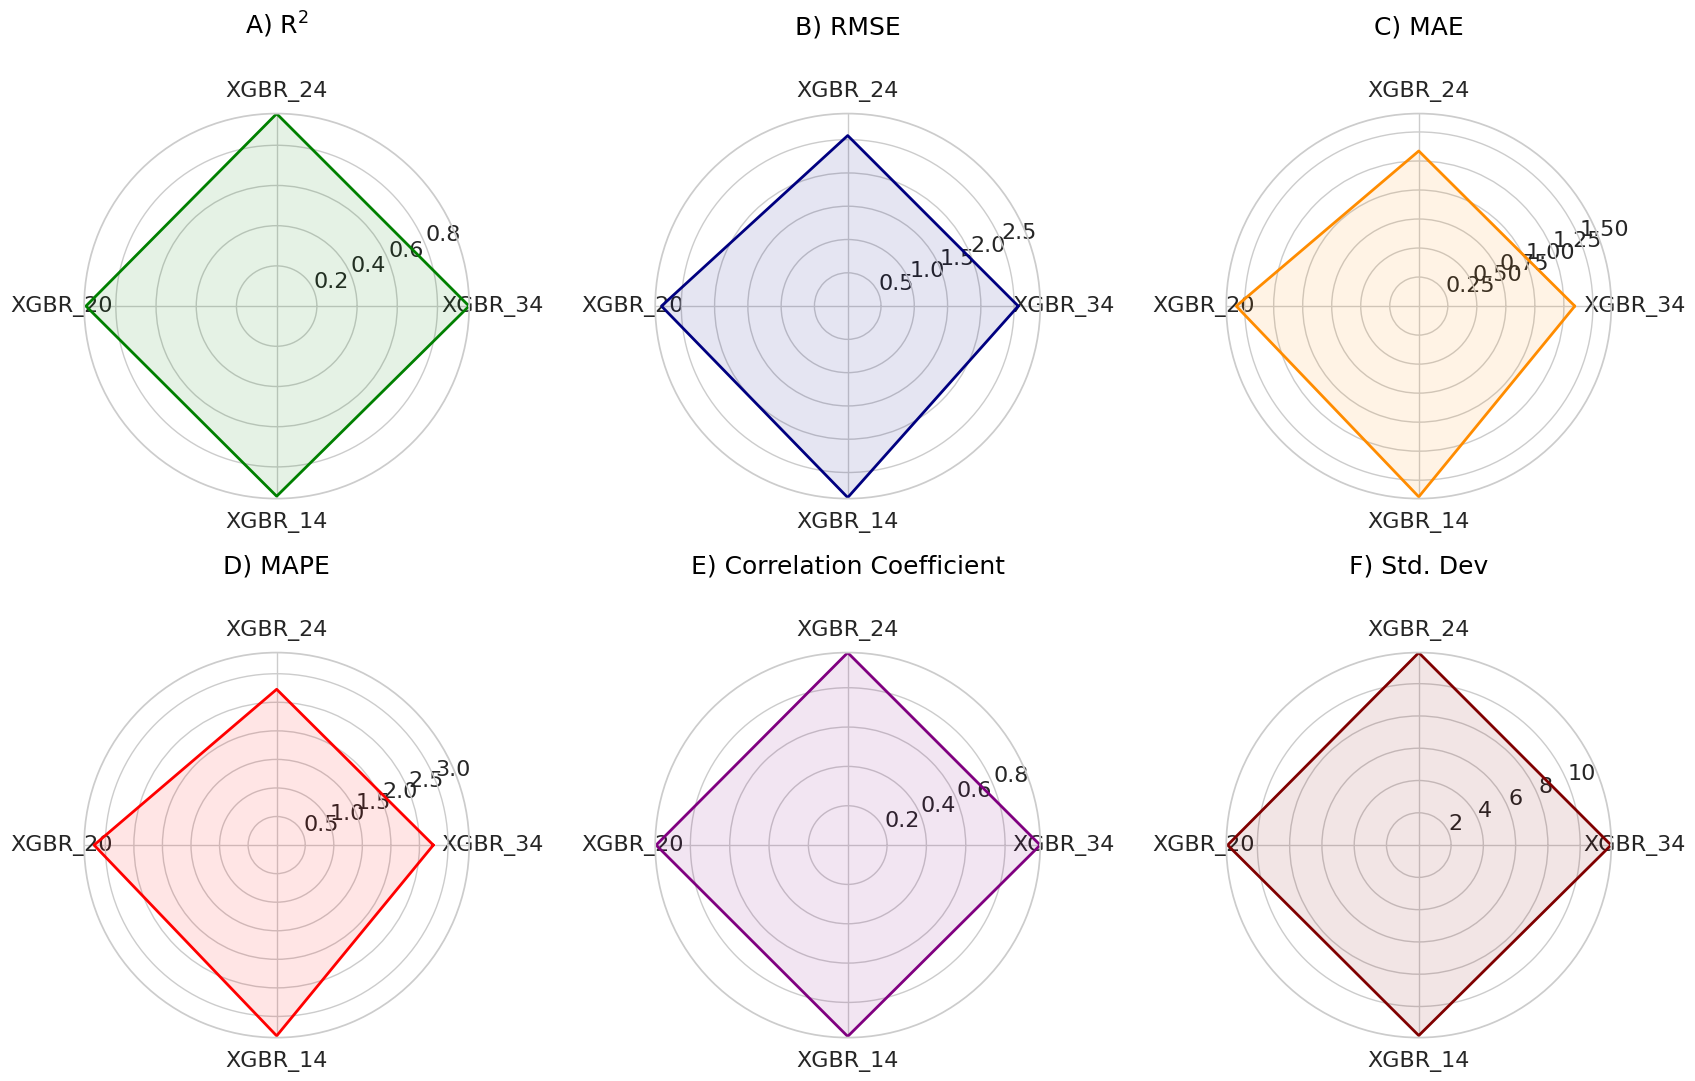

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample performance metrics (replace these with your actual values)
performance_metrics = pd.DataFrame({
    'Model': ['XGBR_34', 'XGBR_24', 'XGBR_20', 'XGBR_14'],
    'RMSE': [avg_rmse_1, avg_rmse_2, avg_rmse_3, avg_rmse_4],
    'MAE': [avg_mae_1, avg_mae_2, avg_mae_3, avg_mae_4],
    'R-squared': [avg_r2_1, avg_r2_2, avg_r2_3, avg_r2_4],
    'MAPE': [avg_mape_1, avg_mape_2, avg_mape_3, avg_mape_4],
    'Correlation Coefficient': [avg_corr_1, avg_corr_2, avg_corr_3, avg_corr_4],
    'Std. Dev (True)': [avg_std_true_1, avg_std_true_2, avg_std_true_3, avg_std_true_4],
    'Std. Dev (Pred)': [avg_std_pred_1, avg_std_pred_2, avg_std_pred_3, avg_std_pred_4]
}).set_index('Model')

# Radar plot function
def make_radar_chart(data, categories, ax, title, color):
    num_vars = len(categories)

    # Compute the angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop"
    values = data.tolist()
    values += values[:1]  # Close the loop
    angles += angles[:1]

    # Draw the radar chart
    ax.fill(angles, values, color=color, alpha=0.10)
    ax.plot(angles, values, color=color, linewidth=2)

    # Labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=16)  # Set label font size to 16

    # Set title
    ax.set_title(title, size=18, color='black', y=1.1,pad=30)

    # Set tick font size
    ax.tick_params(labelsize=16)

# Create a 2x3 grid for the radar charts
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), subplot_kw=dict(polar=True))

# Define metrics to plot
metrics = ['R-squared', 'RMSE', 'MAE', 'MAPE', 'Correlation Coefficient', 'Std. Dev (Pred)']
titles = ['A) R$^2$', 'B) RMSE', 'C) MAE', 'D) MAPE', 'E) Correlation Coefficient', 'F) Std. Dev']

# Define a color for each plot
colors = ['green', 'navy', 'darkorange', 'red', 'purple', 'maroon']

# Loop through the metrics and create a radar chart for each
for ax, metric, title, color in zip(axes.flatten(), metrics, titles, colors):
    make_radar_chart(performance_metrics[metric].values, performance_metrics.index.tolist(), ax, title, color)

# Adjust layout to reduce distance between plots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plot
plt.show()



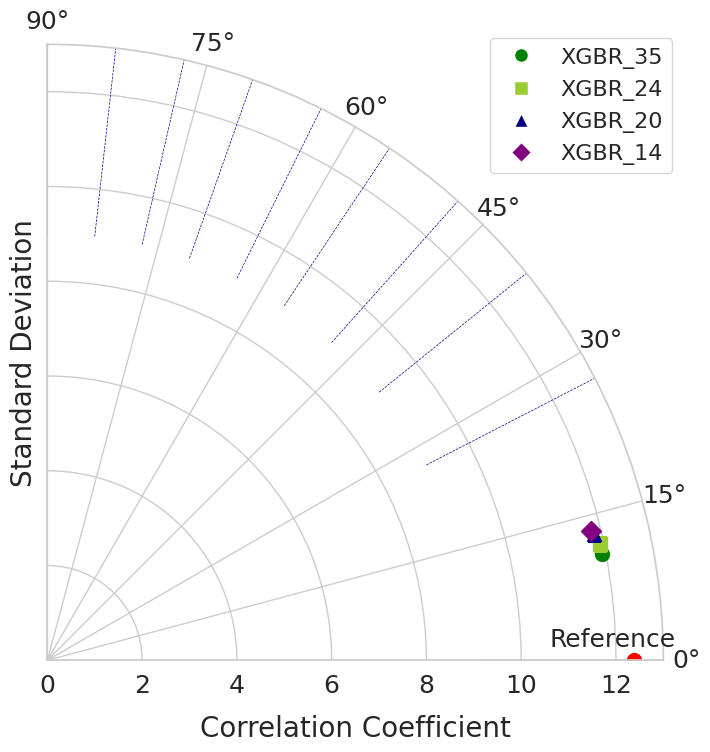

In [ ]:
# Define a function to create the Taylor Diagram using Cartopy and Matplotlib
class CartopyTaylorDiagram:
    def __init__(self, refstd, fig=None, rect=111, label='Reference'):
        self.refstd = refstd
        self.fig = fig if fig is not None else plt.figure(figsize=(10, 8))
        self.ax = self.fig.add_subplot(rect, projection='polar')

        # Set the plot background to very light blue

        # Set the limits of the polar plot
        self.ax.set_ylim(0, 13)  # Set y-axis limit to the range of 9 to 13
        self.ax.set_xlim(0, np.pi / 2)

        # Add the reference point at (0, refstd)
        self.ax.plot(0, refstd, 'o', color='red', markersize=10, label=label)
        self.ax.annotate(label, (0, refstd), textcoords="offset points",
                         xytext=(-15, 10), ha='center', fontsize=18)

        # Set up gridlines and labels for better readability
        self.ax.grid(True)

        # Increase the font size for tick labels
        self.ax.tick_params(axis='both', which='major', labelsize=18)

        # Add labels for axes
        self.ax.set_xlabel("Correlation Coefficient", fontsize=20, labelpad=30)
        self.ax.set_ylabel("Standard Deviation", fontsize=20, labelpad=1, rotation=90)

    def add_sample(self, stddev, corrcoef, marker, *args, **kwargs):
        theta = np.arccos(corrcoef)  # Convert correlation coefficient to angle
        r = stddev
        self.ax.plot(theta, r, marker, *args, **kwargs)

    def add_correlation_lines(self):
        corrs = np.linspace(0, 1, 10)
        for corr in corrs:
            angle = np.arccos(corr)
            self.ax.plot([angle, angle], [9, 13], ls='--', color='navy', lw=0.5)

    def add_grid(self):
        self.ax.grid(True, linestyle='--', color='navy', alpha=0.5)

# Example data (Replace these with your actual data)
std_true = 12.375933  # True standard deviation
models = ['XGBR_35', 'XGBR_24', 'XGBR_20', 'XGBR_14']
std_pred = [11.914834, 11.920269, 11.841797, 11.798067]
correlations = [0.9822328, 0.978438, 0.974237, 0.972789]  # Fixed correlations (0-1 range)

# Define custom colors for markers
colors = ['green', 'yellowgreen', 'navy', 'purple']  # Green, Red, Navy, Magenta (high intensity)

# Create the Taylor Diagram
fig = plt.figure(figsize=(10, 8))
taylor_diag = CartopyTaylorDiagram(std_true, fig=fig)

# Add correlation lines
taylor_diag.add_correlation_lines()

# Define different markers for each model
markers = ['o', 's', '^', 'D']  # Circle, square, triangle, diamond

# Add each model to the diagram with specified colors and markers
for i, (std, corr) in enumerate(zip(std_pred, correlations)):
    taylor_diag.add_sample(std, corr, marker=markers[i],
                          color=colors[i], markersize=10, linestyle='none')

# Create custom legend handles with specified colors
legend_handles = [plt.Line2D([0], [0], marker=markers[i], color='w',
                             label=models[i], markerfacecolor=colors[i],
                             markersize=10) for i in range(len(models))]

# Add legend to the right
plt.legend(handles=legend_handles, loc='center left',
           bbox_to_anchor=(0.7, 0.9), fontsize=16)

# Show the plot
plt.show()

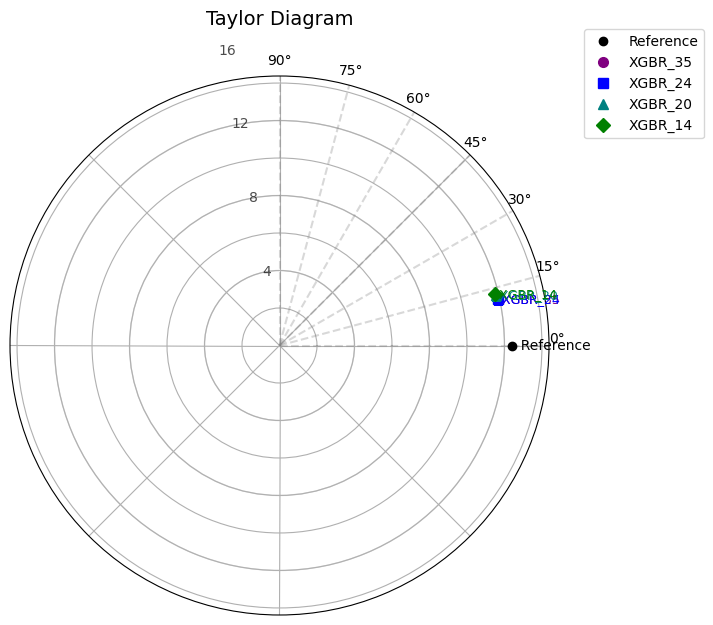

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------------------------------------------------
# 1. DEFINE YOUR DATA
# -------------------------------------------------------------------------
# Observed (reference) standard deviation
ref_std = 12.375933

# Dictionary of models: { model_name: (std_pred, corr) }
models = {
    'XGBR_35': (11.914834, 0.978449),
    'XGBR_24': (11.920269, 0.978438),
    'XGBR_20': (11.841797, 0.974237),
    'XGBR_14': (11.798067, 0.972789),
}

# For plotting colors/markers
model_styles = {
    'XGBR_35': {'marker': 'o', 'color': 'purple'},
    'XGBR_24': {'marker': 's', 'color': 'blue'},
    'XGBR_20': {'marker': '^', 'color': 'teal'},
    'XGBR_14': {'marker': 'D', 'color': 'green'},
}


# -------------------------------------------------------------------------
# 2. CREATE THE POLAR PLOT (TAYLOR DIAGRAM)
# -------------------------------------------------------------------------
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111, polar=True)

# Hide the default polar labels (we'll customize below)
ax.set_xticklabels([])
ax.set_yticklabels([])

# We want radial = Standard Deviation, so set an upper limit a bit larger
rmax = ref_std + 2
ax.set_rlim(0, rmax)

# -------------------------------------------------------------------------
# 3. DRAW GRID LINES AND LABELS
# -------------------------------------------------------------------------

# (A) Standard Deviation circles
# Choose some "nice" intervals for SD circles
sd_levels = [0, 4, 8, 12, 16]
for sd in sd_levels:
    # Draw circle
    circle = plt.Circle((0, 0), sd, transform=ax.transData._b,
                        color='grey', fill=False, linestyle='-', alpha=0.3)
    ax.add_artist(circle)
    # Label the circle (avoid labeling the center circle at radius=0)
    if sd > 0:
        ax.text(
            np.radians(100), sd, f"{sd}", color="black", alpha=0.7,
            ha='center', va='center', fontsize=10
        )

# (B) Correlation spokes
# We label angles 0°, 15°, 30°, 45°, 60°, 75°, 90°
corr_angles_deg = [0, 15, 30, 45, 60, 75, 90]
for deg in corr_angles_deg:
    theta = np.radians(deg)
    # Draw the spoke (line from origin to outer circle)
    ax.plot([theta, theta], [0, rmax], color='grey', linestyle='--', alpha=0.3)
    # Label correlation
    # correlation = cos(theta)
    corr_val = np.cos(theta)
    ax.text(
        theta, rmax * 1.03, f"{deg}°",
        ha='center', va='bottom', fontsize=10, color='black'
    )

# -------------------------------------------------------------------------
# 4. PLOT THE REFERENCE POINT
# -------------------------------------------------------------------------
# Reference is at correlation=1 (theta=0) and radius=ref_std
ax.plot([0], [ref_std], 'ko', label="Reference", markersize=6)
ax.text(
    np.radians(0), ref_std, "  Reference", fontsize=10,
    ha='left', va='center', color='black'
)

# -------------------------------------------------------------------------
# 5. PLOT EACH MODEL
# -------------------------------------------------------------------------
for name, (std_pred, corr) in models.items():
    # Convert correlation to angle via theta = arccos(corr)
    theta = np.arccos(corr)
    # Plot the model point
    style = model_styles.get(name, {})
    ax.plot(theta, std_pred, marker=style.get('marker','o'),
            color=style.get('color','red'),
            label=name, markersize=7, linestyle='None')
    # Annotate (optional)
    ax.text(theta, std_pred, f" {name}", fontsize=9,
            ha='left', va='center', color=style.get('color','red'))

# -------------------------------------------------------------------------
# 6. ADD LEGEND, TITLE, AND SHOW
# -------------------------------------------------------------------------
# (You can also rely on text labels near the points instead of a legend.)
plt.title("Taylor Diagram", fontsize=14, y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


In [ ]:
!pip install git+https://github.com/drawingfromdata/CartopyTaylorDiagram.git

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopyTaylorDiagram import TaylorDiagram

# Observed (reference) standard deviation
ref_std = 12.375933

# Dictionary of models: { model_name: (std_pred, corr) }
models = {
    'XGBR_35': (11.914834, 0.978449),
    'XGBR_24': (11.920269, 0.978438),
    'XGBR_20': (11.841797, 0.974237),
    'XGBR_14': (11.798067, 0.972789),
}

# Create figure and Taylor diagram
fig = plt.figure(figsize=(8, 8))
diagram = TaylorDiagram(
    refstd=ref_std,     # Reference standard deviation
    fig=fig,
    rect=111,
    srange=(0, 16),     # Range for radial axis (std dev)
    label='Reference'
)

# Add each model sample with reduced alpha
for name, (std_pred, corr) in models.items():
    diagram.add_sample(
        std_pred,
        corr,
        marker='o',
        ms=8,
        alpha=0.6,        # reduce marker opacity
        label=name
    )

# Make the grid and contours semi-transparent
diagram.add_grid(alpha=0.2, lw=1.0)      # radial/circular grid lines
diagram.add_contours(alpha=0.2, lw=1.0)  # RMS error contours

# Move the legend away from the plot area (to the right)
fig.legend(
    diagram.samplePoints,
    [p.get_label() for p in diagram.samplePoints],
    loc='upper right',
    bbox_to_anchor=(1.3, 1.0)  # Increase x offset to move it further right
)

plt.title("Taylor Diagram with Reduced Alpha and Spaced-Out Labels", fontsize=14)
plt.show()


  Cloning https://github.com/drawingfromdata/CartopyTaylorDiagram.git to /tmp/pip-req-build-uveidqn_
  Running command git clone --filter=blob:none --quiet https://github.com/drawingfromdata/CartopyTaylorDiagram.git /tmp/pip-req-build-uveidqn_
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/drawingfromdata/CartopyTaylorDiagram.git /tmp/pip-req-build-uveidqn_ did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/drawingfromdata/CartopyTaylorDiagram.git /tmp/pip-req-build-uveidqn_ did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


ModuleNotFoundError: No module named 'cartopy'

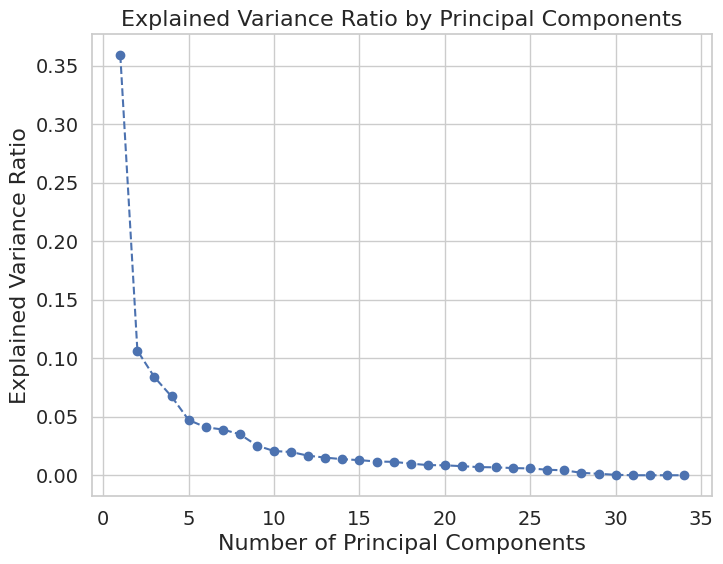

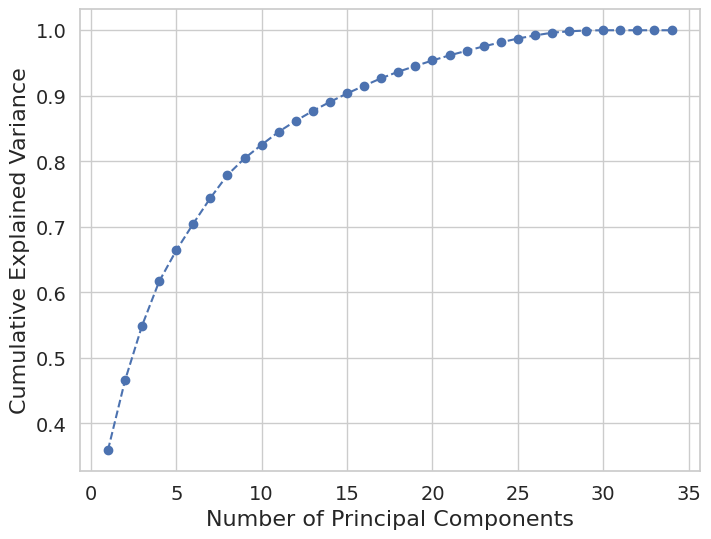

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming you have the feature matrix for model_xgbr_1, let's call it 'X'

# Standardize the feature matrix (important for PCA)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Create a PCA model
pca = PCA()

# Fit PCA to the standardized feature matrix
pca.fit(X_standardized)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components', fontsize=16)
plt.ylabel('Explained Variance Ratio', fontsize=16)
plt.title('Explained Variance Ratio by Principal Components', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components', fontsize=16)
plt.ylabel('Cumulative Explained Variance', fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have the feature matrix for model_xgbr_1, let's call it 'X'

# Standardize the feature matrix (important for PCA)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Create a PCA model
pca = PCA()

# Fit PCA to the standardized feature matrix
pca.fit(X_standardized)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components needed to explain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed to explain 95% variance: {n_components}")

# Now, you can use the selected number of components to perform dimensionality reduction
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_standardized)

Number of components needed to explain 95% variance: 20


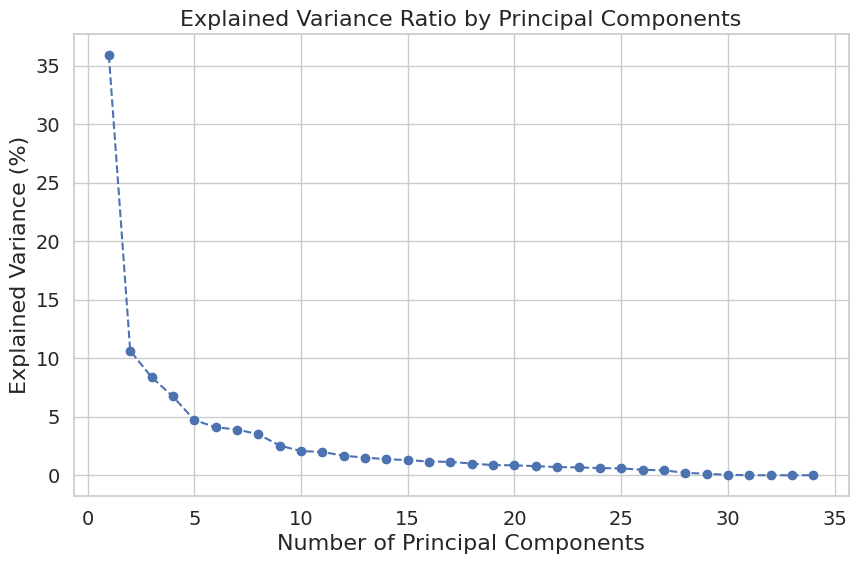

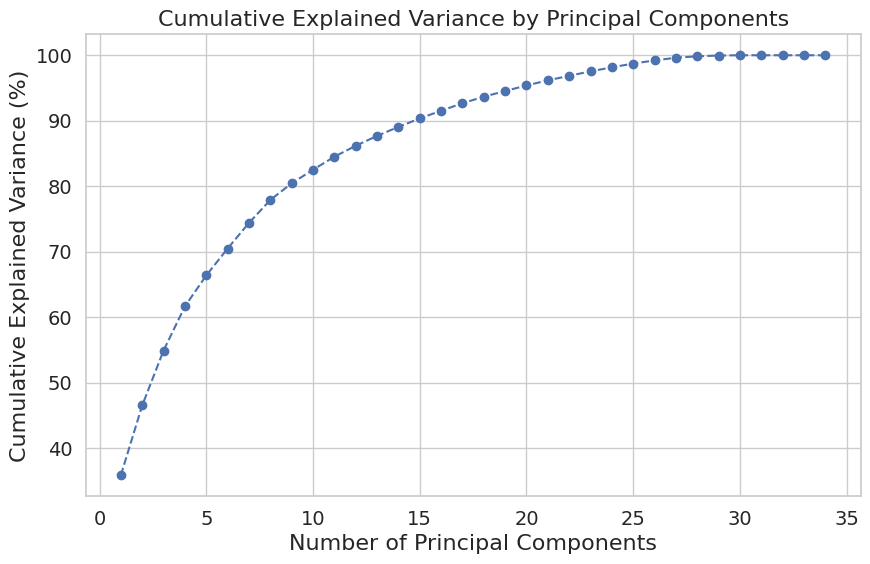

Number of components needed to explain 95% variance: 20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have the feature matrix for model_xgbr_1, let's call it 'X'

# Standardize the feature matrix (important for PCA)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Create a PCA model and fit it to the standardized feature matrix
pca = PCA()
pca.fit(X_standardized)

# Calculate the explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components needed to explain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Plot explained variance ratio in percentage
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components', fontsize=16)
plt.ylabel('Explained Variance (%)', fontsize=16)
plt.title('Explained Variance Ratio by Principal Components', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components', fontsize=16)
plt.ylabel('Cumulative Explained Variance (%)', fontsize=16)
plt.title('Cumulative Explained Variance by Principal Components', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

print(f"Number of components needed to explain 95% variance: {n_components}")


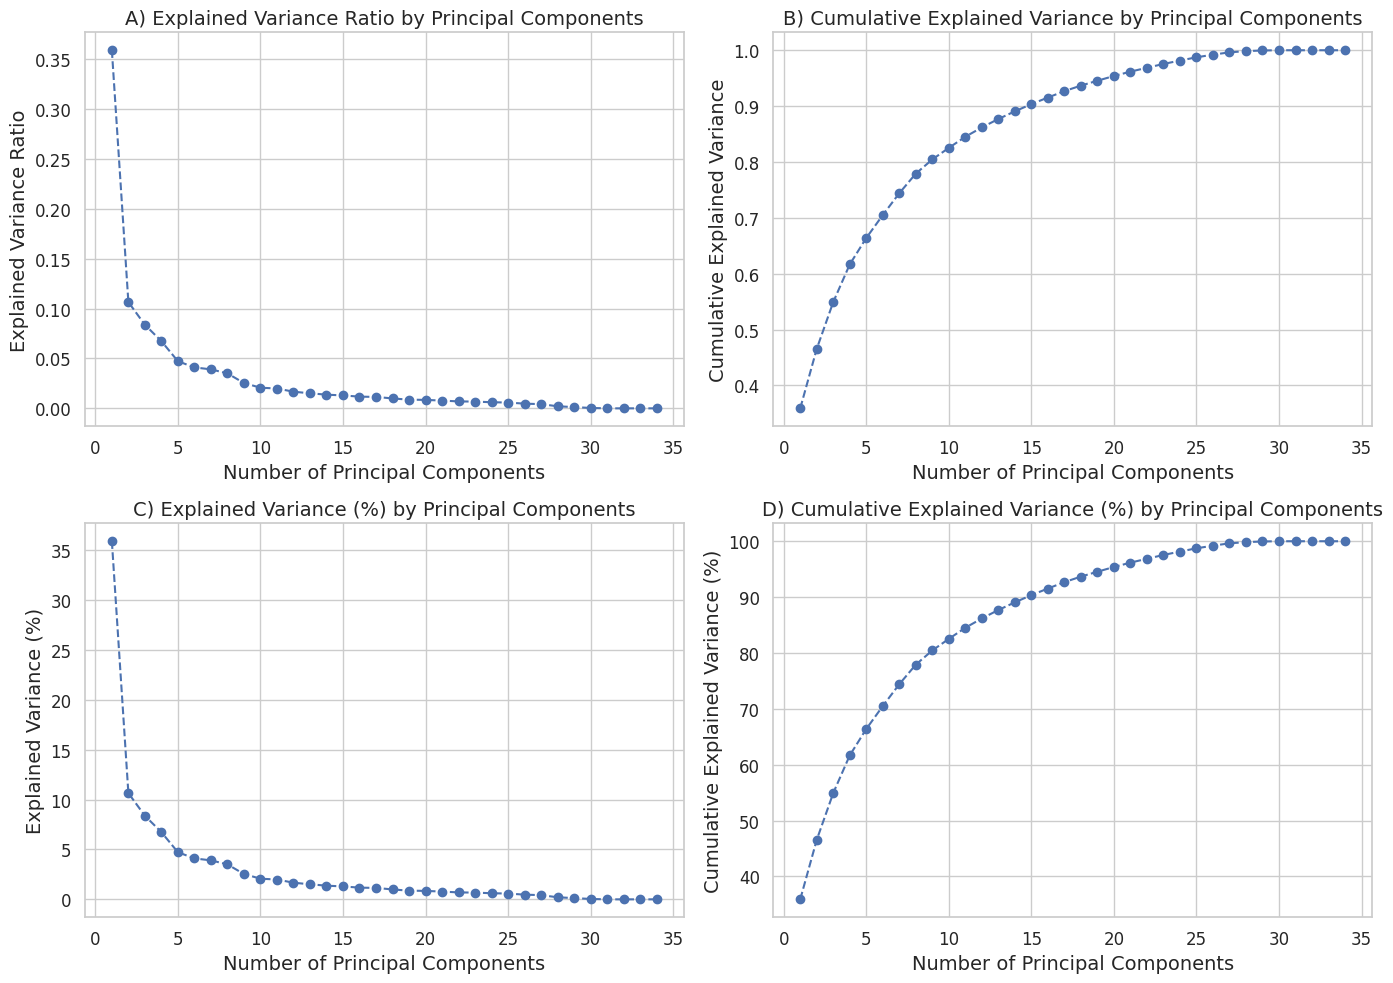

Number of components needed to explain 95% variance: 20


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have the feature matrix for model_xgbr_1, let's call it 'X'

# Standardize the feature matrix (important for PCA)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Create a PCA model and fit it to the standardized feature matrix
pca = PCA()
pca.fit(X_standardized)

# Calculate the explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components needed to explain 95% variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

# Set up the figure for a 2x2 grid layout
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Explained Variance Ratio by Principal Components
axs[0, 0].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
axs[0, 0].set_xlabel('Number of Principal Components', fontsize=14)
axs[0, 0].set_ylabel('Explained Variance Ratio', fontsize=14)
axs[0, 0].set_title('A) Explained Variance Ratio by Principal Components', fontsize=14)
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='both', which='major', labelsize=12)

# Plot 2: Cumulative Explained Variance by Principal Components
axs[0, 1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
axs[0, 1].set_xlabel('Number of Principal Components', fontsize=14)
axs[0, 1].set_ylabel('Cumulative Explained Variance', fontsize=14)
axs[0, 1].set_title('B) Cumulative Explained Variance by Principal Components', fontsize=14)
axs[0, 1].grid(True)
axs[0, 1].tick_params(axis='both', which='major', labelsize=12)

# Plot 3: Explained Variance Ratio in Percentage by Principal Components
axs[1, 0].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, marker='o', linestyle='--')
axs[1, 0].set_xlabel('Number of Principal Components', fontsize=14)
axs[1, 0].set_ylabel('Explained Variance (%)', fontsize=14)
axs[1, 0].set_title('C) Explained Variance (%) by Principal Components', fontsize=14)
axs[1, 0].grid(True)
axs[1, 0].tick_params(axis='both', which='major', labelsize=12)

# Plot 4: Cumulative Explained Variance in Percentage by Principal Components
axs[1, 1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, marker='o', linestyle='--')
axs[1, 1].set_xlabel('Number of Principal Components', fontsize=14)
axs[1, 1].set_ylabel('Cumulative Explained Variance (%)', fontsize=14)
axs[1, 1].set_title('D) Cumulative Explained Variance (%) by Principal Components', fontsize=14)
axs[1, 1].grid(True)
axs[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Print the number of components required to explain 95% of the variance
print(f"Number of components needed to explain 95% variance: {n_components}")


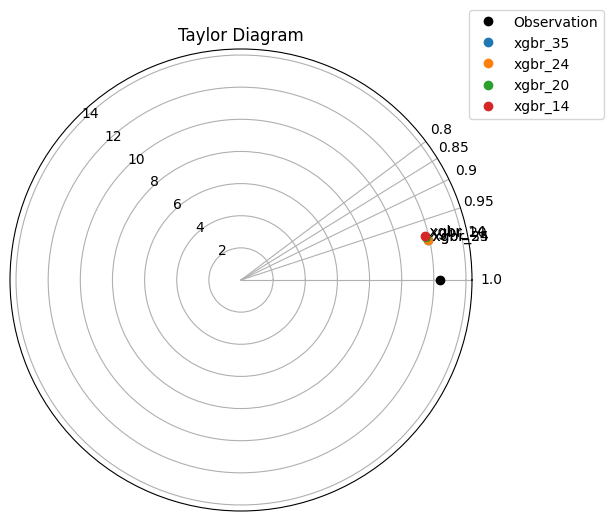

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the reference standard deviation (observations)
ref_std = 12.375933

# Define model data in a dictionary
models = {
    'xgbr_35': {'std_pred': 11.914834, 'corr': 0.978449},
    'xgbr_24': {'std_pred': 11.920269, 'corr': 0.978438},
    'xgbr_20': {'std_pred': 11.841797, 'corr': 0.974237},
    'xgbr_14': {'std_pred': 11.798067, 'corr': 0.972789},
}

# Create a polar plot
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)

# Plot the reference observation point (perfect correlation: corr = 1 -> theta = 0)
ax.plot(0, ref_std, 'ko', label='Observation')

# Plot each model on the Taylor diagram
for name, stats in models.items():
    std_pred = stats['std_pred']
    corr = stats['corr']
    # Calculate the polar angle: theta = arccos(correlation coefficient)
    theta = np.arccos(corr)
    ax.plot(theta, std_pred, 'o', label=name)
    # Annotate the model near its point
    ax.text(theta, std_pred, ' ' + name, fontsize=10)

# Customize the polar axes

# Define theta grid (in degrees) corresponding to some correlation values.
# For example, correlation of 1.0 -> theta=0°, 0.9 -> theta=arccos(0.9) etc.
corr_ticks = [1.0, 0.95, 0.90, 0.85, 0.80]
theta_ticks = [np.degrees(np.arccos(c)) for c in corr_ticks]
ax.set_thetagrids(theta_ticks, labels=[str(c) for c in corr_ticks])

# Set radial limits a bit beyond the observed std for clarity
ax.set_rlim(0, ref_std + 2)
ax.set_rlabel_position(135)  # Move radial labels away from plotted points

# Add a title and legend
plt.title('Taylor Diagram')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Show the diagram
plt.show()
